# Modules 

In [1]:
#from Modules import *
import numpy as np
from tp_perceptron_source import (rand_gauss, rand_bi_gauss, rand_checkers,
                                  rand_clown, plot_2d, gradient,
                                  plot_gradient, frontiere_new,
                                  hinge_loss, gr_hinge_loss,
                                  mse_loss, zero_one_loss, gr_mse_loss)
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

In [2]:
# Plot
plt.close('all')
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Computer Modern Roman']})
params = {'axes.labelsize': 12,
          'font.size': 16,
          'legend.fontsize': 16,
          'text.usetex': False,
          'figure.figsize': (8, 6)}
plt.rcParams.update(params)
# Seaborn
sns.set_context("poster")
sns.set_palette("colorblind")
sns.set_style("white")
sns.axes_style()
# Seed initialization
np.random.seed(seed=44)
# For saving files
saving_activated = True # False

# 1. Analyses des fonctions de génération de données 

## 1.1. rand_gauss

Nous avons ici la fonction rand_gauss. Elle permet de générer une donnée contenant : 
- 100 observations,
- des moyennes de deux dimensions X et Y égales respectivement à 1
- des écarts-types égaaux à 1
- res est la taille des données crées. n son nombre de ligne et d son nombre de colonnes 
- d est égal à la longueur du vecteur mu. Dans notre cas, d est égal à 2 car mu=[1, 1]
- la dernière ligne signifie qu'on bascule le centre de la distribution de (0,0) à la spécification de la moyenne et correspondre les écarts-types aussi à ce qu'on veut.

## 1.2. Représentation graphique des fonctions 

### 1.2.1 rand_bi_gauss uniquement

#### 1.2.1.1 Simulation du changement des écarts-types

X1 (40, 2) (40,)


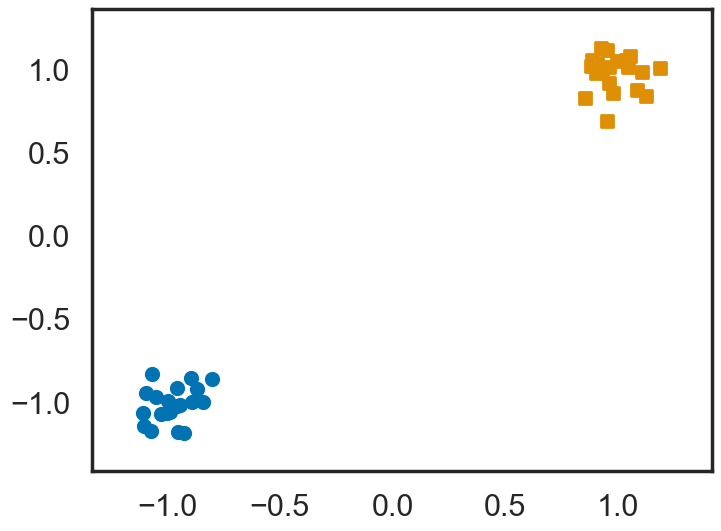

In [3]:
X1, y1 =rand_bi_gauss(n1=20, n2=20, mu1=[1, 1], mu2=[-1, -1], sigmas1=[0.1, 0.1],sigmas2=[0.1, 0.1])
print('X1',X1.shape,y1.shape)
fig, ax = plt.subplots()
plot_2d(X1, y1)

Les deux échantillons de classes sont non seulement éloignés mais ayant une variation moindre. Il faut les rapprocher.

X1 (40, 2) (40,)


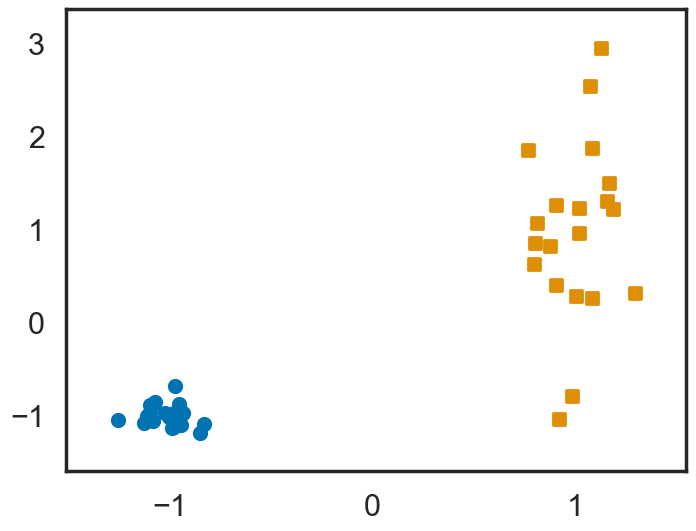

In [4]:
X1, y1 =rand_bi_gauss(n1=20, n2=20, mu1=[1, 1], mu2=[-1, -1], sigmas1=[0.1, 0.9],sigmas2=[0.1, 0.1])
print('X1',X1.shape,y1.shape)
fig, ax = plt.subplots()
plot_2d( X1, y1)

X1 (40, 2) (40,)


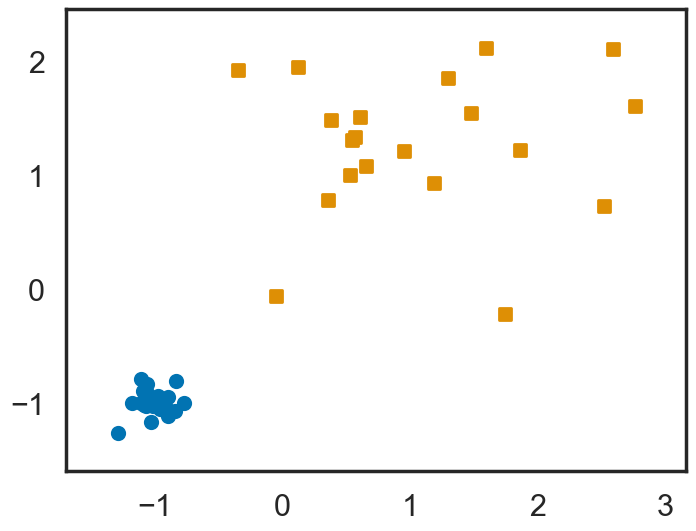

In [6]:
X1, y1 =rand_bi_gauss(n1=20, n2=20, mu1=[1, 1], mu2=[-1, -1], sigmas1=[0.9, 0.9],sigmas2=[0.1, 0.1])
print('X1',X1.shape,y1.shape)
fig, ax = plt.subplots()
plot_2d(X1, y1)

X1 (40, 2) (40,)


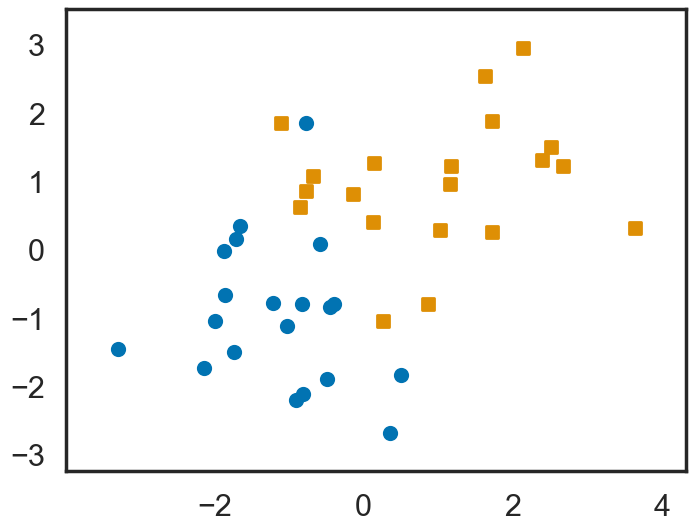

In [4]:
X1, y1 =rand_bi_gauss(n1=20, n2=20, mu1=[1, 1], mu2=[-1, -1], sigmas1=[0.9, 0.9],sigmas2=[0.9, 0.9])
print('X1',X1.shape,y1.shape)
fig, ax = plt.subplots()
plot_2d(X1, y1)

La fonction rand_bi_gauss renvoie deux données distribuées normales dont : 
- la taille = 20 ; 
- moyenne de la première échantillon est égale à -1 et -1 dans une dimension deux. L'autre 1 et 1. Ce sont des centres de la distributions 
- Chaque distribution a aussi son écart-type. 
La seconde variable de sortie est la répartition des données en classes.

In [5]:
# Création de données avec les deux autres fonctions
X2, y2 = rand_clown(n1=50, n2=50, sigma1=1, sigma2=5)
print('X2',X2.shape,y2.shape)

X3, y3 = rand_checkers(n1=150, n2=150)
print('X3',X3.shape,y3.shape)

X2 (100, 2) (100,)
X3 (288, 2) (288,)


### 1.2.2. Schéma des graphiques

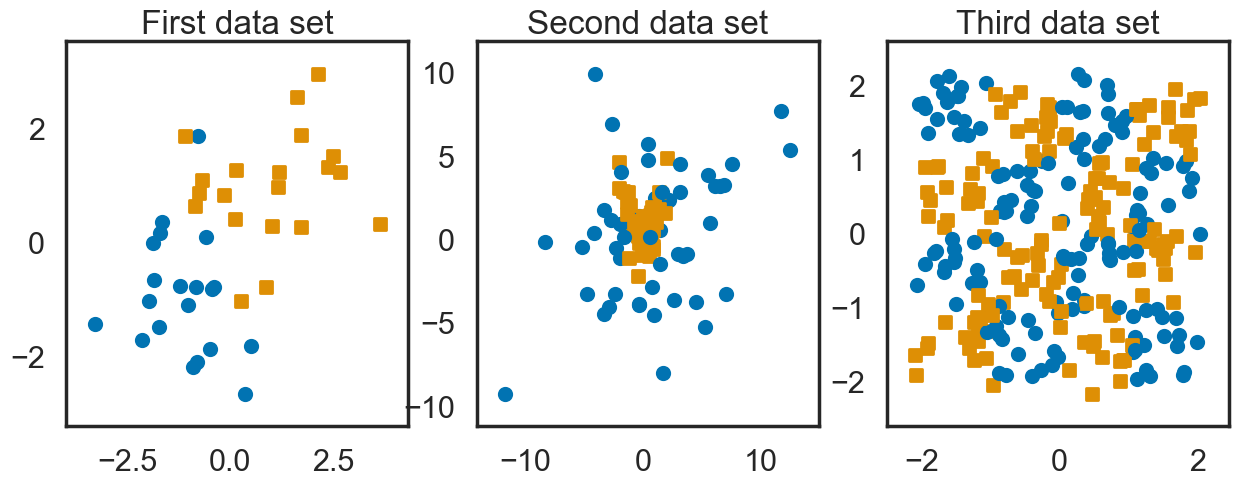

In [6]:
plt.close("all")
plt.figure(1, figsize=(15, 5))
plt.subplot(131)
plt.title('First data set')
plot_2d(X1, y1)
plt.subplot(132)
plt.title('Second data set')
plot_2d(X2, y2)
plt.subplot(133)
plt.title('Third data set')
plot_2d(X3, y3)
plt.show()

rand_tri c'est comme bi_gauss mais elle renvoie trois classes car il y a trois échantillons générés.

# 2. Sauvegarder les pour une utilisation ultérieure

In [8]:
X_bi_gauss = np.array(X1)
Y_bi_gauss = np.array(y1)
X_clown = np.array(X2)
Y_clown = np.array(y2)
X_chekers = np.array(X3)
Y_chekers = np.array(y3)

# 3. Question graphique (déjà répondu)

# Classifieur linéaire (affine)

## Exemple personnel simple pour comprendre le perceptron

Imaginons un problème simple de classification où nous avons deux caractéristiques : le poids et la taille d'un fruit. Nous voulons classer les fruits en pommes (1) et oranges (-1).

    Si nous avons un vecteur de poids w = (w0, w1, w2) égale à (-3, 2, 1), alors notre hyperplan est défini par l'équation -3 + 2*(poids) + 1*(taille) = 0.
    Pour un fruit de 1kg (poids) et de 10cm (taille), nous calculons f(x) = -3 + 2*1 + 1*10 = 9. Comme 9 est positif, notre modèle prédit que ce fruit est une pomme (1).
    Pour un autre fruit de 0.5kg (poids) et de 8cm (taille), nous calculons f(x) = -3 + 2*0.5 + 1*8 = 4.5. Encore une fois, le résultat est positif, donc le modèle prédit une pomme (1).

En réalité, l'algorithme d'apprentissage comme le perceptron ajusterait les poids w en fonction des données d'entraînement pour trouver le meilleur hyperplan qui sépare les deux classes. Cet hyperplan est celui où les erreurs de classification sont minimisées ou où la marge entre les deux classes est maximisée.

Dans le cadre du perceptron, il faut donc 
- Calculer la valeur de la fonction de décision
- Appliquer la fonction signe à cette valeur
- La sortie sera 1 si f^w(x)≥0 (ce qui signifie que l'observation x est classée dans la classe 1), et -1 si f^w(x)<0 (ce qui signifie que x est classée dans la classe -1).

# 1.

## 1.1. Signification de la frontière de décision 

# Réponse personnelle
La frontière de décision est reflettée par la fonction de décision et la signe de cette fonction. En effet, la fonction de décision donne une valeur. Si cette valeur est égale à 1, alors le point est classé dans la classe 1 (ou éventuellement un objet donné). Dans le cas contraire, ç'est-à-dire que la valeur de la fonction de décision est inférieur à -1, ainsi on a un point dans la classe -1. Par déduction, la frontière de décision est en fait le signe de fw(x) (1 et -1) à partir de laquelle un point x est classé dans l'un ou l'autre classe.  

# Correction personnelle à partir de la lecture
Il y a un léger malentendu sur la manière dont la frontière de décision fonctionne pour le perceptron en deux dimensions (p=2).
Pour dire clairement, la frontière de décision pour un perceptron dans un espace à deux dimensions (p = 2) est une ligne droite qui sépare les échantillons en deux parties. Chaque côté de la ligne représente une des deux classes. Dans l'image suivante, la frontière de décision est en vert : 
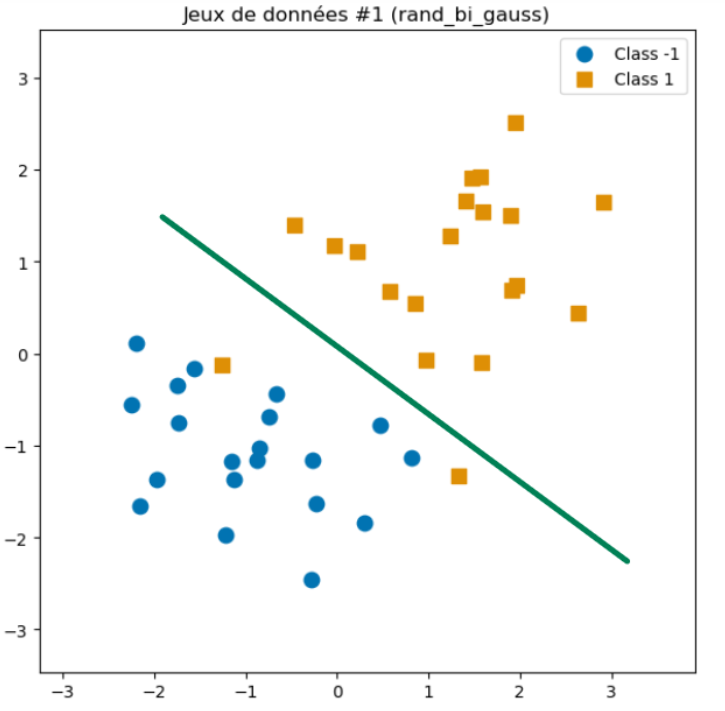

Pourquoi c'est une droite? 
- La fonction de décision se définit par la formule suivante : 

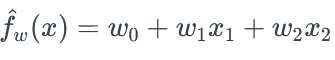

- On obtient la frontière de décision lorsqu'on égalise à 0 la fonction de décision. Ainsi, on a la relation suivante après organisation : 

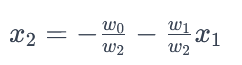

C'est une équation linéaire en 2 dimension qui définit une ligne droite. Ici, -w0/w2 est l'intercept (l'ordonnée à l'origine), et -w1/w2 est la pente de la droite x2 exprimé en fonction de x1.

- En d'autres termes, la frontière de décision est le lieu des points pour lesquels la fonction de décision est égale à 0. Ce n'est pas une valeur de la fonction de décision, mais plutôt la condition pour laquelle la fonction de décision s'annule. Celà signifie que la ligne de frontière de décision est l'ensemble des points x dans l'espace des variables où la fonction de décision est égale à zéro.

- Classification : 
  Pour classer un point x, on calcule la fonction de décision
  Si elle est positive, le point est classé dans la classe 1. 
  Si elle est négative, le point est classé dans la classe -1. 
  La valeur exacte de la fonction de décision n'est pas 1 ou -1; ce sont les signes de ces valeurs qui sont importants.

# Quand est-ce que la fonction de décision est grand? Positif? Négatif? 

La fonction de décision est une fonction des entrées x et des paramètres du modèle w. 

Cas 1 : x > 0 ; w > 0
Si x est grand, alors la fonction est grande. Néanmoins, il faut préciser que la grandeur de la fonction de décision dépend largement des poids Wn. Plus ces poids sont élevés, plus la fonction de décision l'est. Il s'agit aussi de l'intercept W0.

Cas 2 : x < 0 ; w < 0
Ici, c'est l'inverse de ce qu'on a eu auparavant.

Dans les deux cas (voir d'autres cas), si ∣f^w(x)∣ est grande, cela signifie que la projection du point x dans la direction définie par le vecteur de poids w est éloignée du seuil de décision. C'est indépendant de la classe prédite. Cela implique une plus grande confiance dans la prédiction de la classification. En effet, le point se situe bien dans une région qui est fortement associée à une des classes.

La fonction de décision est positif si (Somme Wj * Xj) > - W0.
Dans un contexte de classification binaire, cela indique généralement que le point de données xx est classé dans la classe positive (souvent notée +1). Géométriquement, cela signifie que le point se situe du côté de l'hyperplan de décision où les prédictions sont positives.

La fonction de décision est négatif si (Somme Wj * Xj) < - W0.
Dans un cadre de classification binaire, cela signifie que le point de données est classé dans la classe négative (souvent notée -1). Géométriquement, le point est situé du côté de l'hyperplan de décision où les prédictions sont négatives.

# La signification géométrique de la fonction de décision

La signification géométrique de la fonction de décision est qu'elle détermine le côté de l'hyperplan sur lequel un point de données se trouve.

En effet, la fonction de décision mesure essentiellement la distance algébrique d'un point de données x à l'hyperplan de décision. La distance algébrique peut être positive, négative ou zéro, en fonction de la position du point par rapport à l'hyperplan.

    Si f^w(x)>0, le point x se situe d'un côté de l'hyperplan, généralement associé à la classe positive (+1).
    Si f^w(x)<0, le point se trouve de l'autre côté de l'hyperplan, associé à la classe négative (-1).
    Si f^w(x)=0, le point est exactement sur l'hyperplan, indiquant une incertitude quant à la classification.

La valeur absolue de la fonction de décision indique la distance du point à l'hyperplan. Une valeur plus élevée signifie que le point est plus éloigné de l'hyperplan, indiquant une plus grande confiance dans la classification du point de données.

# W0

w0 est appelé est l'ordonné de départ. C'est un paramètre du modèle qui permet de décaler la frontière de décision. Sans ce terme, l'hyperplan de décision serait contraint de passer par l'origine (le point où toutes les caractéristiques xj sont égales à zéro). Le biais permet à l'hyperplan de décision de se déplacer vers le haut ou vers le bas. On l'appelle aussi le terme de biais.

Dans l'inégalité (Somme Wj * Xj) > - W0. Le terme −w0 sert au modèle d'ajuster le seuil à partir duquel les points de données sont classés dans une classe ou dans une autre. Si w0 est grand et positif, la frontière de décision est déplacée de telle sorte qu'il est plus difficile pour la somme pondérée des variables d'atteindre un total positif. Dans ce cas, il est difficile pour un point d'être classé dans la classe positive. Inversement, un w0 négatif abaisse ce seuil.

# 2. Vérification des fonctions

In [9]:
#Code en forme de fonctions auxiliaires
def predict (x,w):
    x = np.array(x)
    w = np.array(w)
    return np.dot(w[1:], x) + w[0]

def predict_class(x, w):
    """Predict a class from at point x thanks to a normal vector."""
    return np.sign(predict(x, w))

In [10]:
x_example = [-0.5, 6, 3]  
w_example = [0.5, -1, 2, -3]

print("Fonction de décision:", predict(x_example, w_example))
print("Classe prédite:", predict_class(x_example, w_example))

Fonction de décision: 4.0
Classe prédite: 1.0


In [11]:
print(type(x_example))

<class 'list'>


# Fonction de coût

R est la valeur prédite par le modèle, Y est la valeur réelle ou l'étiquette, et R+ est la mesure de l'erreur ou de la perte résultant de la différence entre la prédiction et la valeur réelle. La fonction de perte ℓ quantifie donc le "coût" d'une prédiction incorrecte ou inexacte.

Plus exactement, le coût que l'on veut minimiser en fonction de w est l’espérance de la fonction de perte
sur l’ensemble des données : 
E[ℓ(f^w(x),y)]
Il s'agit de minimiser l'écart entre le résultat de la fonction de décision à chaque entrée x et la valeur réelle y.


## 3. Nature des fonctions

### 3.1.Essaie personnelle sur la fonction perte erreur quadratique MSE

D'une manière générale, la nature d'une fonction est visible à travers sa représentation graphique. Voilà pourquoi on a choisi de se procéder à la représentation graphique du MSE suivant : 
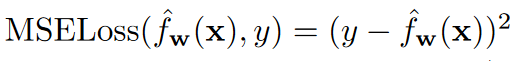
Pour ce faire, il nous faut une donnée d'entrée X pour calculer la fonction de décision. De même, il est nécessaire d'avoir Y, la valeur réelle à prédire par la fonction de décision. On termine avec le calcul de l'écart entre y et la fonction de décision à chaque observation afin de représenter graphiquement ces écarts.

In [12]:
# Données : 
X_bi_gauss
Y_bi_gauss

# Création de w
print(X_bi_gauss.shape)
## La forme de X_bi_gauss est (40, 2), nous créons donc w avec la forme (3,) pour correspondre à 2 caractéristiques + 1 pour le biais
w = np.random.randn(3)  # Cela inclut deux poids et un terme de biais

(40, 2)


In [13]:
def predict_1(x, w):
    return np.dot(x, w)

# Nous ajoutons une colonne de 1s à X_bi_gauss pour le terme de biais
X_bi_gauss_with_bias = np.hstack((np.ones((X_bi_gauss.shape[0], 1)), X_bi_gauss))

decision_scores = predict_1(X_bi_gauss_with_bias, w)
print(decision_scores)

[ 1.41024589  1.14571056 -1.11691224 -1.51679146  0.2837079  -0.1024266
  1.22306253  1.18071654 -0.05958156  0.42742085 -1.06001345 -0.21217589
 -2.3263089   0.45318763  0.10680924 -0.80559953 -1.58184134 -0.76782568
 -0.4225861  -0.31390225 -1.01982057 -0.20260557 -1.10803096 -1.24847214
  0.07823634 -0.62569096 -0.0700226  -2.3086984  -2.14263589  0.10867248
 -1.34876721  0.58406382  0.15489041 -1.22361615 -1.61681316 -1.20840609
 -2.25485392 -3.01986734 -1.5088054   0.05184906]


In [14]:
# Vérification de la dimension des matrices 
print(decision_scores.shape)
print(Y_bi_gauss.shape)

(40,)
(40,)


In [15]:
mse_loss(X_bi_gauss,Y_bi_gauss, w)

array([1.68301692e-01, 4.60407382e+00, 1.36684721e-02, 2.67073409e-01,
       5.13074371e-01, 8.05638002e-01, 4.97568926e-02, 3.26584689e-02,
       1.12271309e+00, 3.27846878e-01, 3.60161439e-03, 6.20666834e-01,
       1.75909530e+00, 2.99003765e-01, 7.97789730e-01, 3.26018967e+00,
       6.66590470e+00, 5.39049172e-02, 3.33406816e-01, 1.72633911e+00,
       3.92854807e-04, 1.44626016e+00, 1.16706890e-02, 6.17384053e-02,
       8.49648251e-01, 2.64287111e+00, 1.14494837e+00, 1.71269151e+00,
       1.30561678e+00, 7.94464753e-01, 1.21638569e-01, 1.73002909e-01,
       7.14210211e-01, 5.00041817e-02, 3.80458469e-01, 4.87705745e+00,
       1.57465835e+00, 4.07986406e+00, 6.29410454e+00, 1.10638644e+00])

In [16]:
def mse_loss_1(x, y, w):
    """Mean square error loss."""
    return (y - predict_1(x, w)) ** 2

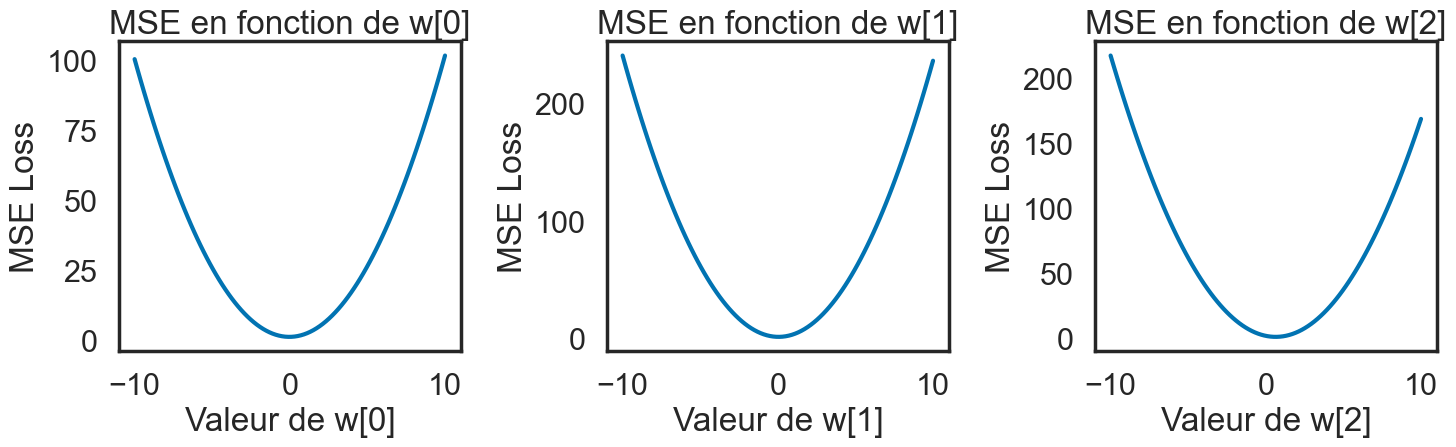

In [17]:
fig, axes = plt.subplots(1, len(w), figsize=(15, 5)) 

for i in range(len(w)):
    weight_values = np.linspace(-10, 10, 100)  # Range of weight values to test
    MSE_losses = []

    # Vary the ith weight component and calculate MSE
    for val in weight_values:
        w_temp = w.copy()
        w_temp[i] = val  # Modify the ith component of the weight vector
        mse = mse_loss_1(X_bi_gauss_with_bias, Y_bi_gauss, w_temp)
        MSE_losses.append(np.mean(mse))  # Append the mean of the MSE values

    # Plot the curve for the ith weight component on the ith subplot
    axes[i].plot(weight_values, MSE_losses)
    axes[i].set_xlabel(f'Valeur de w[{i}]')
    axes[i].set_ylabel('MSE Loss')
    axes[i].set_title(f'MSE en fonction de w[{i}]')

# Display the plots
plt.tight_layout()
plt.show()


Chaque graphique présente une parabole qui indique que pour les valeurs de w testées.
C'est normale car on a la logique mathématique suivante : 
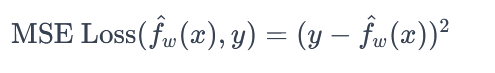
Exprimons la fonction de décision à l'aide de w sous une forme simplifié
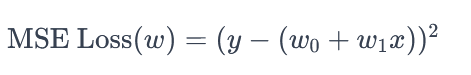
En étendant cela à un vecteur de poids ww pour un modèle avec plusieurs variables, nous obtenons : 
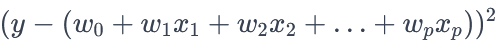
Pour exprimer cela sous la forme d'une parabole en fonction de ww, il faut considérer chaque poids wi individuellement et assumer que tous les autres poids sont constants. Par exemple, pour exprimer la MSE Loss en fonction de w1, on peut considérer tous les autres wj comme constants. La forme quadratique en fonction de w1 serait alors :
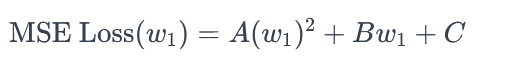
On peut faire de la même manière avec les autres valeurs de W. Ce qui importe c'est qu'ils suivent tous l'expression d'un parabole : 
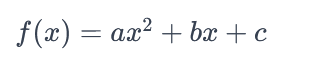

Dans tous les cas, la MSE atteint un minimum à un certain point. Cela suggère qu'il existe une valeur optimale pour chaque poids qui minimise la MSE. L'objectif de l'optimisation est souvent de trouver ces points minimaux pour tous les poids.

## 3.2. Zero oneloss

In [19]:
def zero_one_loss_1(x, y, w):
    """0-1 loss function."""
    return abs(y - np.sign(predict_1(x, w))) / 2

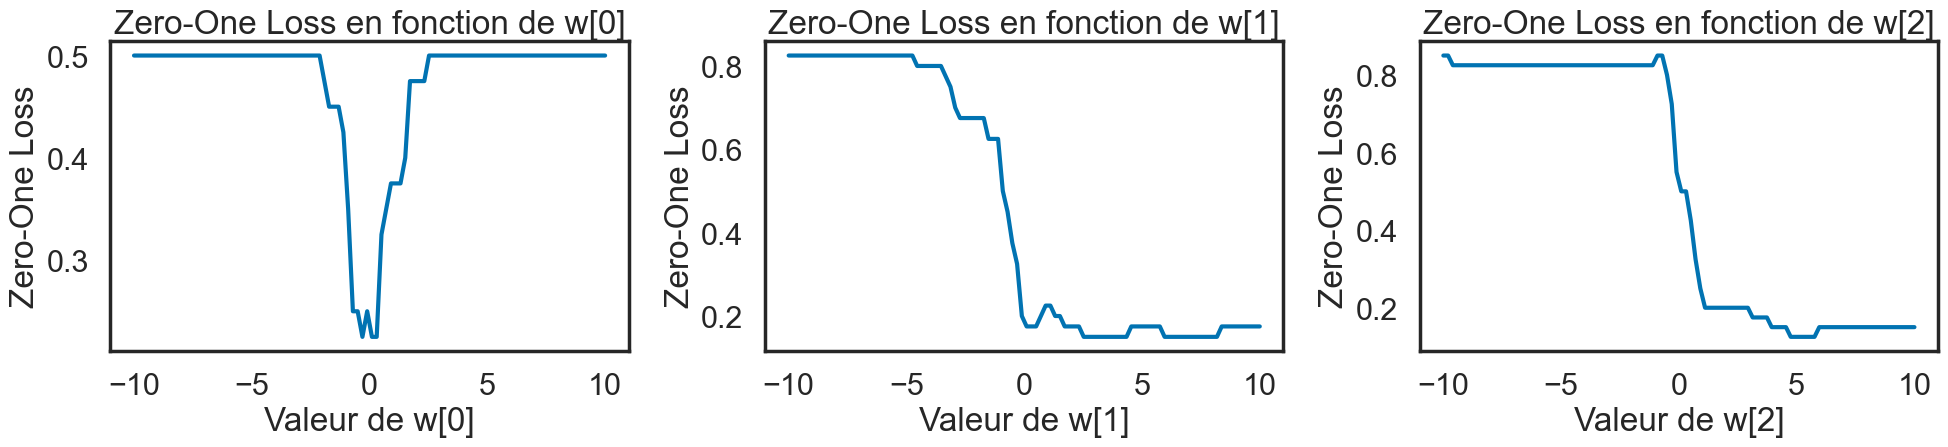

In [20]:
fig, axes = plt.subplots(1, len(w), figsize=(20, 5))

# Define the Zero-One Loss function
def zero_one_loss_1(x, y, w):
    predictions = np.sign(predict_1(x, w))  # Compute predictions as signs of the scores
    zero_one_loss = np.mean(predictions != y)  # Calculate the Zero-One Loss
    return zero_one_loss

# Iterate over each weight component
for i in range(len(w)):
    weight_values = np.linspace(-10, 10, 100)  # Range of weight values to test
    zero_one_losses = []

    # Vary the ith weight component and calculate Zero-One Loss
    for val in weight_values:
        w_temp = w.copy()
        w_temp[i] = val  # Modify the ith component of the weight vector
        zol = zero_one_loss_1(X_bi_gauss_with_bias, Y_bi_gauss, w_temp)
        zero_one_losses.append(zol)

    # Plot the curve for the ith weight component on the ith subplot
    axes[i].plot(weight_values, zero_one_losses)
    axes[i].set_xlabel(f'Valeur de w[{i}]')
    axes[i].set_ylabel('Zero-One Loss')
    axes[i].set_title(f'Zero-One Loss en fonction de w[{i}]')

# Display the plots
plt.tight_layout()
plt.show()

Dans le graphique où W[0], les changements abrupts dans la valeur de la perte suggèrent une fonction qui est constante par morceaux. Cependant, il y a aussi des segments où la fonction change linéairement entre deux discontinuités. Cela indique que la fonction de perte est à la fois linéaire et constante par morceaux sur différents intervalles de w[0].

Ce comportement de w[0] est aussi valable pour w[1] et w[2].

La forme générale est : 
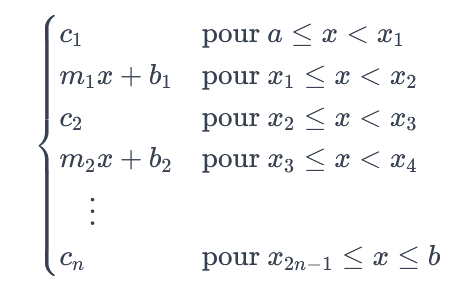

## 3.3. Hingeloss

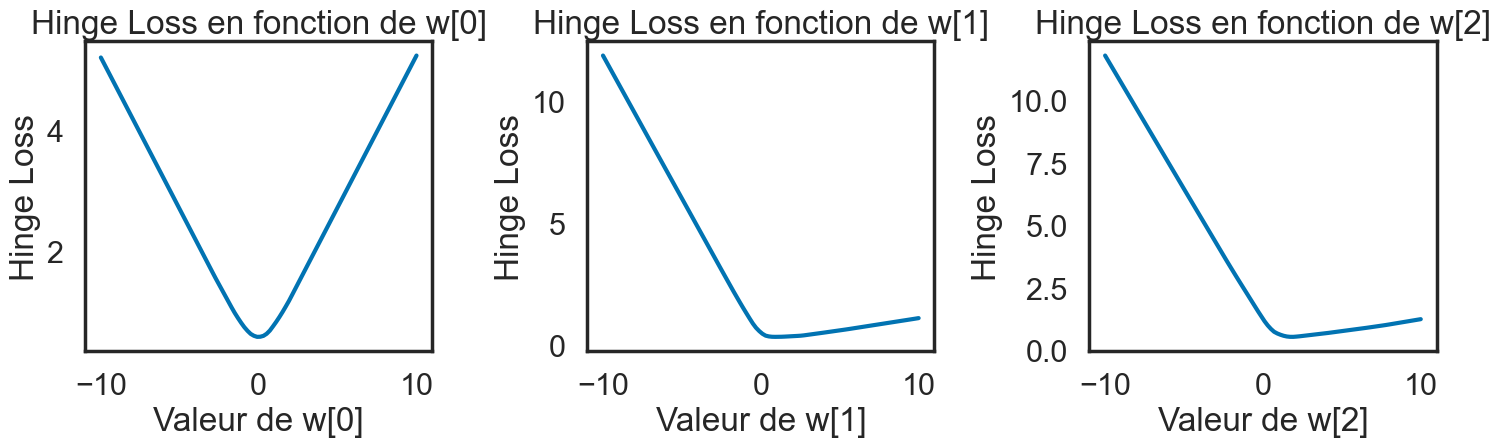

In [21]:
# Define the hinge loss function
def hinge_loss_1(y, x, w):
    hinge_loss = np.maximum(0, 1 - y * predict_1(x, w))
    return hinge_loss

fig, axes = plt.subplots(1, len(w), figsize=(15, 5))

# For each component of w, create a graph of the hinge loss
for i in range(len(w)):
    weight_values = np.linspace(-10, 10, 100)
    hinge_losses = []
    
    for val in weight_values:
        w_temp = w.copy()
        w_temp[i] = val
        hl = hinge_loss_1(Y_bi_gauss, X_bi_gauss_with_bias, w_temp)
        hinge_losses.append(np.mean(hl))  # Append the mean of the hinge losses

    # Plot the curve for the ith weight component on the ith subplot
    ax = axes[i]
    ax.plot(weight_values, hinge_losses)
    ax.set_xlabel(f'Valeur de w[{i}]')
    ax.set_ylabel('Hinge Loss')
    ax.set_title(f'Hinge Loss en fonction de w[{i}]')

plt.tight_layout()
plt.show()

Comparé avec les courbes de MSE, celles de Hinge Loss a une allure d'une fonction quadratique aussi. Mais il y a lieu de souligner qu'elles ne sont pas exactement quatratiques. En effet, d'une intervalle donnée, la fonction est d'abord une droite décroissante. A un moment, donné, elles ont une concavité avant de devenir une droite croissante. Chaque graphique montre une fonction qui semble être composée de deux lignes qui se rejoignent en un point formant un "V". Celà suggère une forme quadratique par morceaux.


A refaire.

# Algorithme de gradient stochastique

## 4. Perceptron version aléatoire

ENTRÉES :
    D : Ensemble de données d'entraînement où chaque élément est un couple (x(i), y(i))
    maxiter : Nombre maximum d'itérations autorisées

SORTIES :
    θ : Vecteur des poids après l'entraînement
    θ0 : Biais après l'entraînement

PROCÉDURE :
1. Initialiser θ à un vecteur de zéros de même dimension que x(i)
2. Initialiser θ0 à 0
3. Pour t de 1 à maxiter faire :
    A. (Avec remise) Pour j de 1 à n faire :
        i. Choisir un indice i aléatoirement parmi {1, ..., n}
        ii. Calculer produit = θ * x(i) + θ0
        iii. Si y(i) * produit ≤ 0 alors :
            a. θ = θ + y(i) * x(i)
            b. θ0 = θ0 + y(i)
    B. (Sans remise) Faire :
        i. Créer une liste d'indices I de 1 à n
        ii. Mélanger la liste I aléatoirement
        iii. Pour chaque indice i dans la liste I faire :
            a. Calculer produit = θ * x(i) + θ0
            b. Si y(i) * produit ≤ 0 alors :
                i. θ = θ + y(i) * x(i)
                ii. θ0 = θ0 + y(i)
4. Si aucun poids n'est mis à jour pendant une itération complète, arrêter avant maxiter
5. Retourner θ et θ0


## 5. Lancement de l'algorithme de perceptron

### 5.1. Sans stochastique

In [44]:
## Les paramètres 
eps = 0.001
niter = 10 
w_ini = np.random.randn(X1.shape[1] + 1)  # d pour les poids et 1 pour le biais
loss_fun = mse_loss
gr_lfun = gr_mse_loss

In [45]:
wh, cost_hist = gradient(X_bi_gauss, Y_bi_gauss, eps, niter, w_ini, loss_fun, gr_lfun, stochastic=False)
print(wh, cost_hist)

[[-0.47344154  0.06228322  0.22365181]
 [-0.435418    0.11356702  0.26191871]
 [-0.40014034  0.15218888  0.29000744]
 [-0.3674611   0.18138029  0.31053459]
 [-0.33722621  0.20354277  0.32544674]
 [-0.30928025  0.22046111  0.33619217]
 [-0.28347008  0.23346196  0.3438485 ]
 [-0.25964724  0.24353154  0.34921768]
 [-0.23766955  0.25140315  0.3528965 ]
 [-0.21740202  0.25762224  0.35532913]] [0.79651243 0.67229868 0.59252377 0.53899193 0.50139407 0.47381676
 0.45280802 0.43630378 0.42303064 0.41217222]


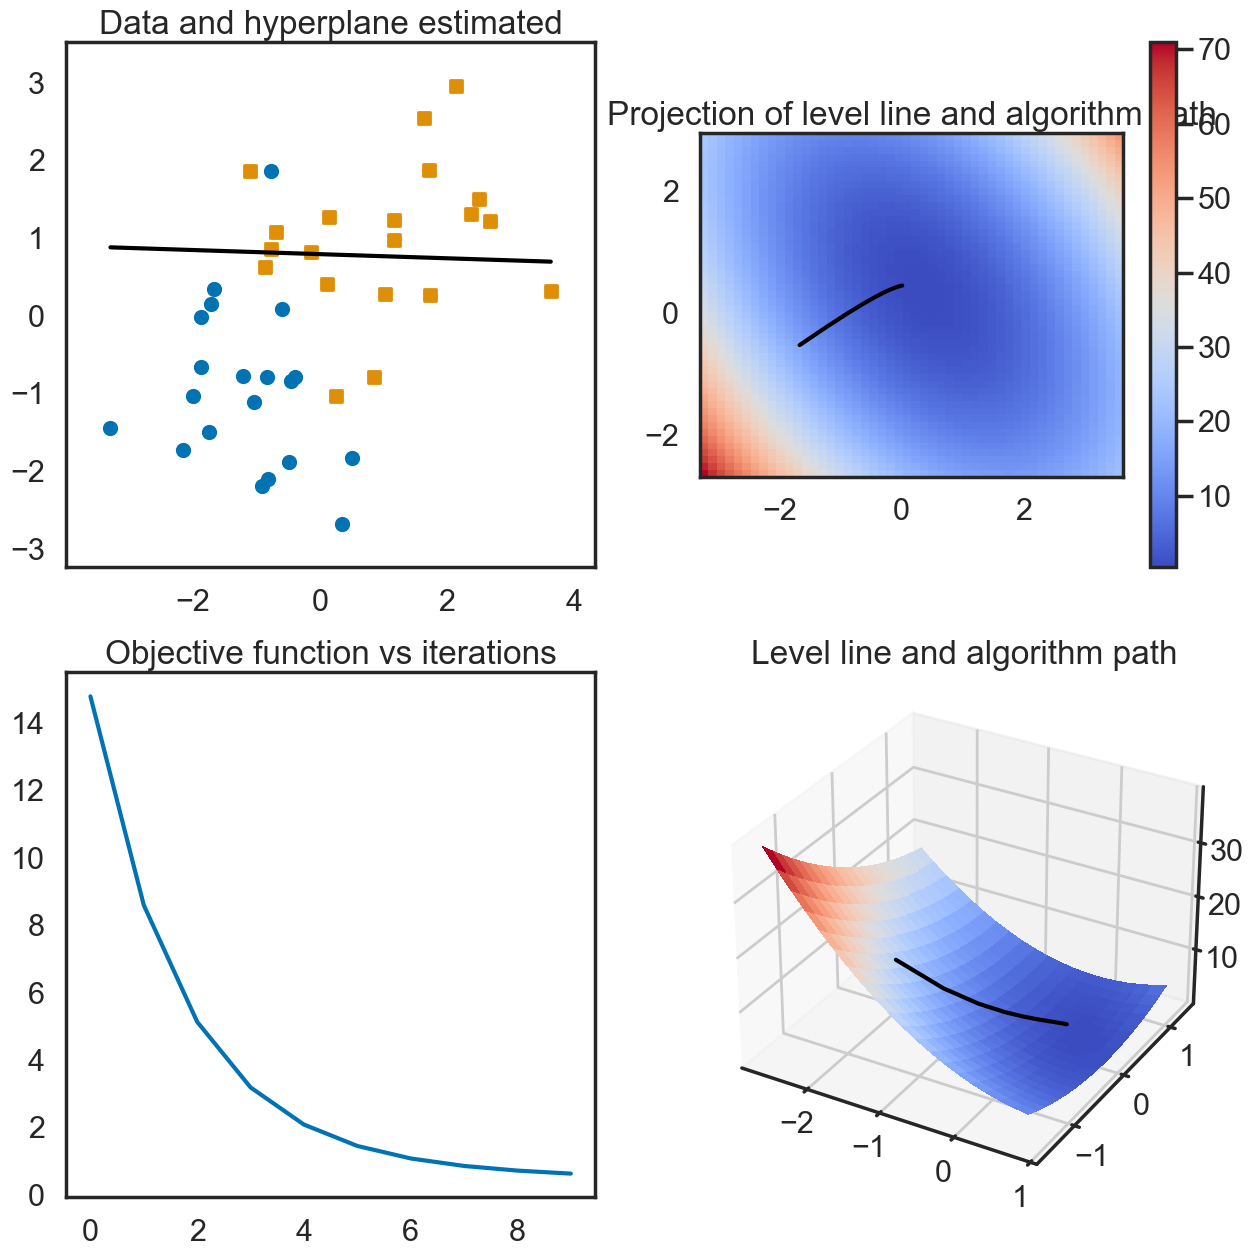

Text(0.5, 0.98, 'MSE and batch')

<Figure size 800x600 with 0 Axes>

In [24]:
plt.figure(7, figsize=(15, 15))
plot_gradient(X_bi_gauss, Y_bi_gauss, wh, cost_hist, loss_fun)
plt.suptitle('MSE and batch')

**Data and hyperplane estimated (Données et hyperplan estimé):** ce graphique montre un ensemble de données bidimensionnelles en deux classes (bleu et orange). La ligne noire est un hyperplan de décision qui a été estimé pour séparer les deux classes à l'aide de la fonction perte MSE.

**Objective function vs iterations (Fonction objectif vs itérations):** La décroissance de la valeur de la fonction objectif ou la fonction de perte en fonction des itérations de l'algorithme. Une diminution de la fonction perte signifie une amélioration de la performance du modèle. Cette amélioration est très forte au départ avant d'accroître petit à petit.

**Projection of level line and algorithm (Projection de la ligne de niveau et de l'algorithme):** Les deux axes représentent indifféremment les poids associés à chacune des variables d'entrées. Par conséquent, l'échelle de couleur représente les valeurs de la fonction objectif (ou fonction de perte) associées à chaque combinaison des paramètres du modèle. Les zones bleues correspondent à des valeurs plus basses de la fonction objectif. Ces zones indiquent des régions de l'espace des paramètres où le modèle a une meilleure performance. Inversement, les zones rouges correspondent à une performance moins bonne du modèle. La ligne noir montre le chemin parcouru par le gradient pour converger vers le minimimum de la fonction perte (les paramètres légèrement supérieures à 0). 

**Level line and algorithm path:** C'est pareil pour le troisième sous-graphique sauf qu'ici la représentation est en 3D.

### 5.2. Avec stochastique

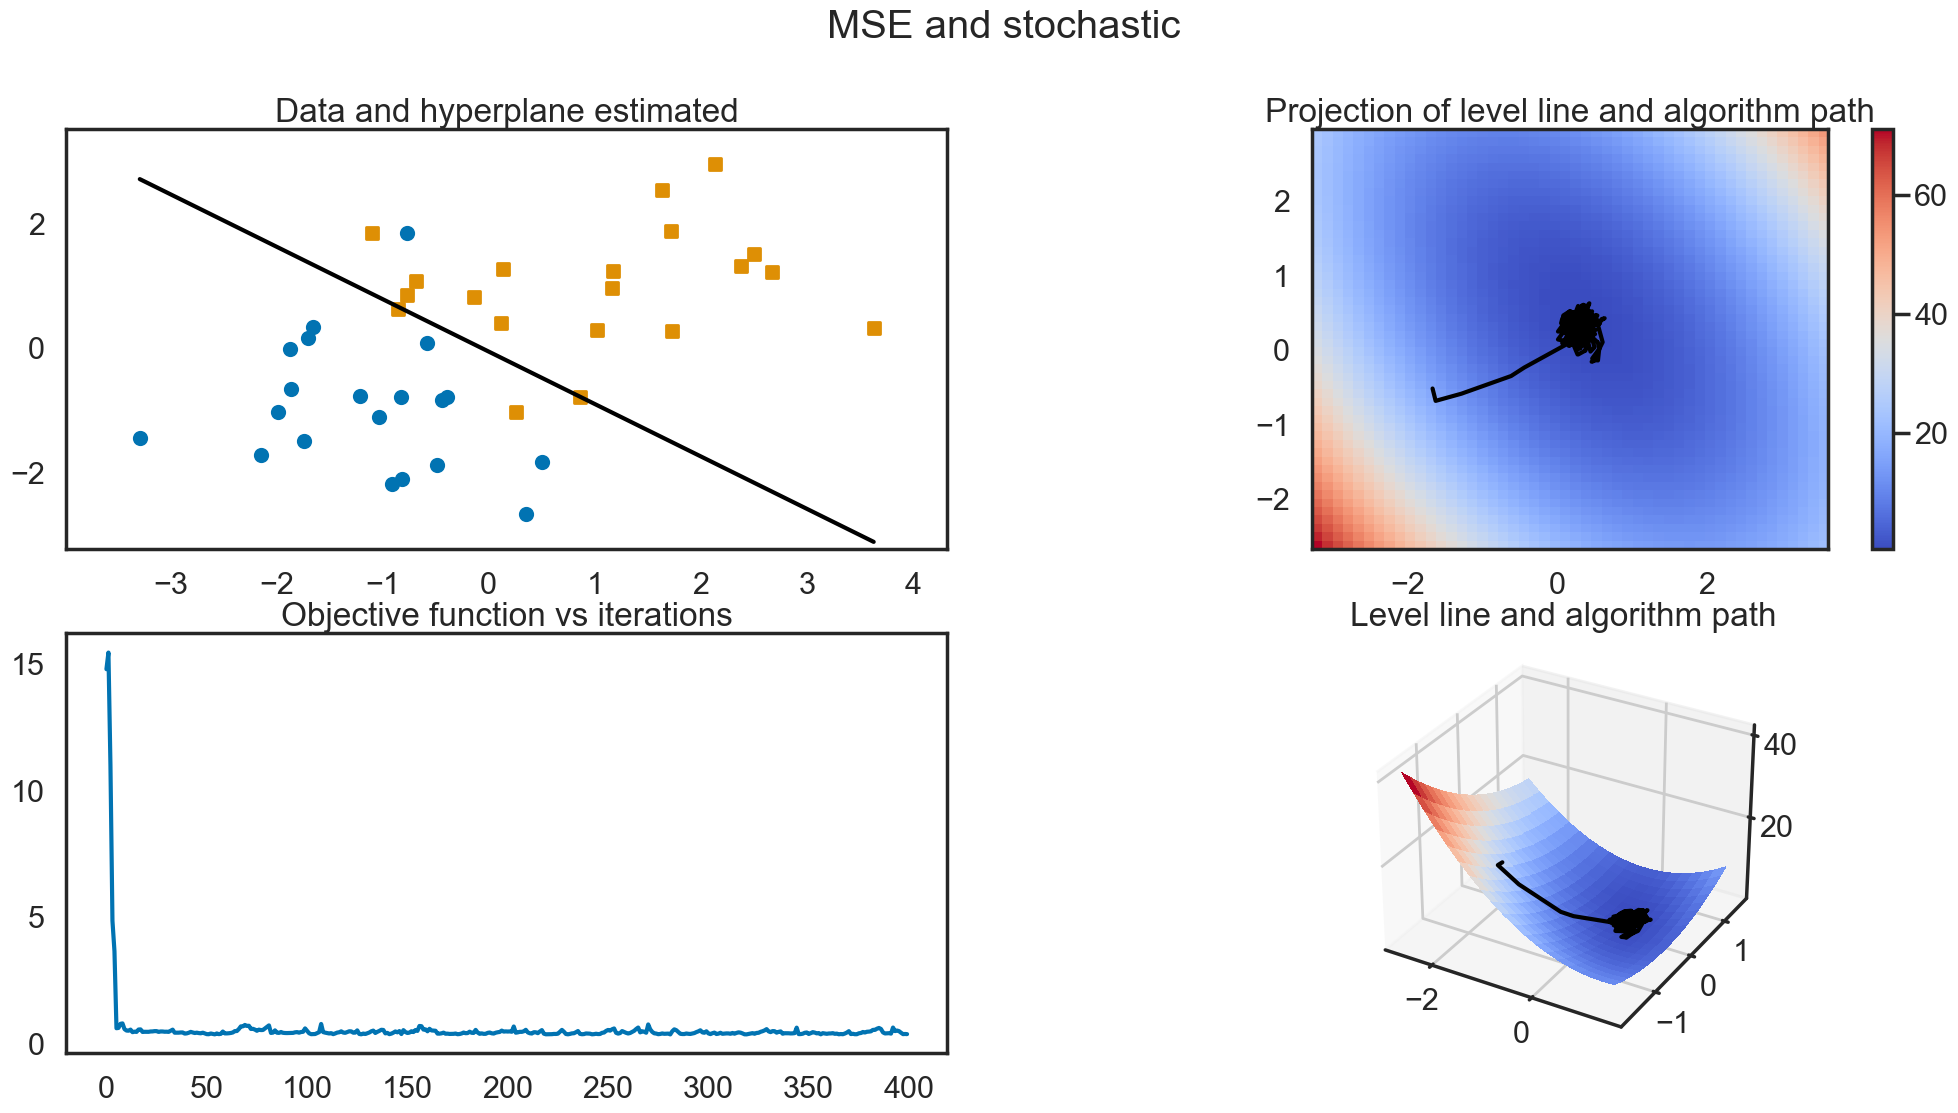

In [25]:
eps = 0.05
plt.figure(8, figsize=(25, 12))
plt.suptitle('MSE and stochastic')
wh_sto, costh_sto = gradient(X1, y1, eps, niter * len(y1), w_ini, loss_fun,
                             gr_lfun, stochastic=True)
plot_gradient(X_bi_gauss, Y_bi_gauss, wh_sto, costh_sto, loss_fun)

La convergence dans le modèle stochastique présente un mouvement très volatile de la fonction de cout. Pourquoi cette trajectoire ? Je pense qu'il y a une raison valable à celà.
En effet, la formule du gradient descent stochastique est la suivante : 
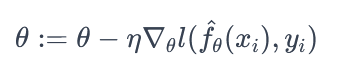
Ici, θ représente le vecteur de paramètres actuel du modèle, η est le taux d'apprentissage, et ∇θl(f^θ(xi),yi) est le gradient de la fonction de perte l par rapport à θ. Le calcul du gradient se fait observations par observations. Dans ce cas, **Chaque mise à jour des paramètres est basée sur le gradient calculé pour un seul exemple (xi,yi).** Cela signifie que la direction de la mise à jour est entièrement déterminée par cet exemple spécifique. Il peut ne pas représenter fidèlement la tendance générale des données. La présence des outliers peut en expliquer. Mais ici, on a utilisé un nombre d'itération largement élevé par rapport au cas gradient simple. D'où un trajectoire très mouvementée. 

Ce qui n'est pas le cas pour l'autre gradient qui se base plutôt sur la moyenne : 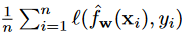
Dans ce cas, chaque mise à jour du vecteur de poids w utilise l'information de toutes les données disponibles. Celà rend la convergence plus lisse.  

### 5.3. Questions théoriques : niter *len(y1)

Ce nombre d'itération confirme ce qu'on a vu tout à l'heure. Le gradient stochastique doit parcourir une à une les observations.

 ## 6. Expérimentations avec stochastique

Pour profiter pleinement de ce passage, on fait aussi une simulation avec le facteur multiplicatif au départ avant de procéder au changement des variables.

## 6.1. simulation du facteur multiplicatif de descente

### 6.1.1. Diminution

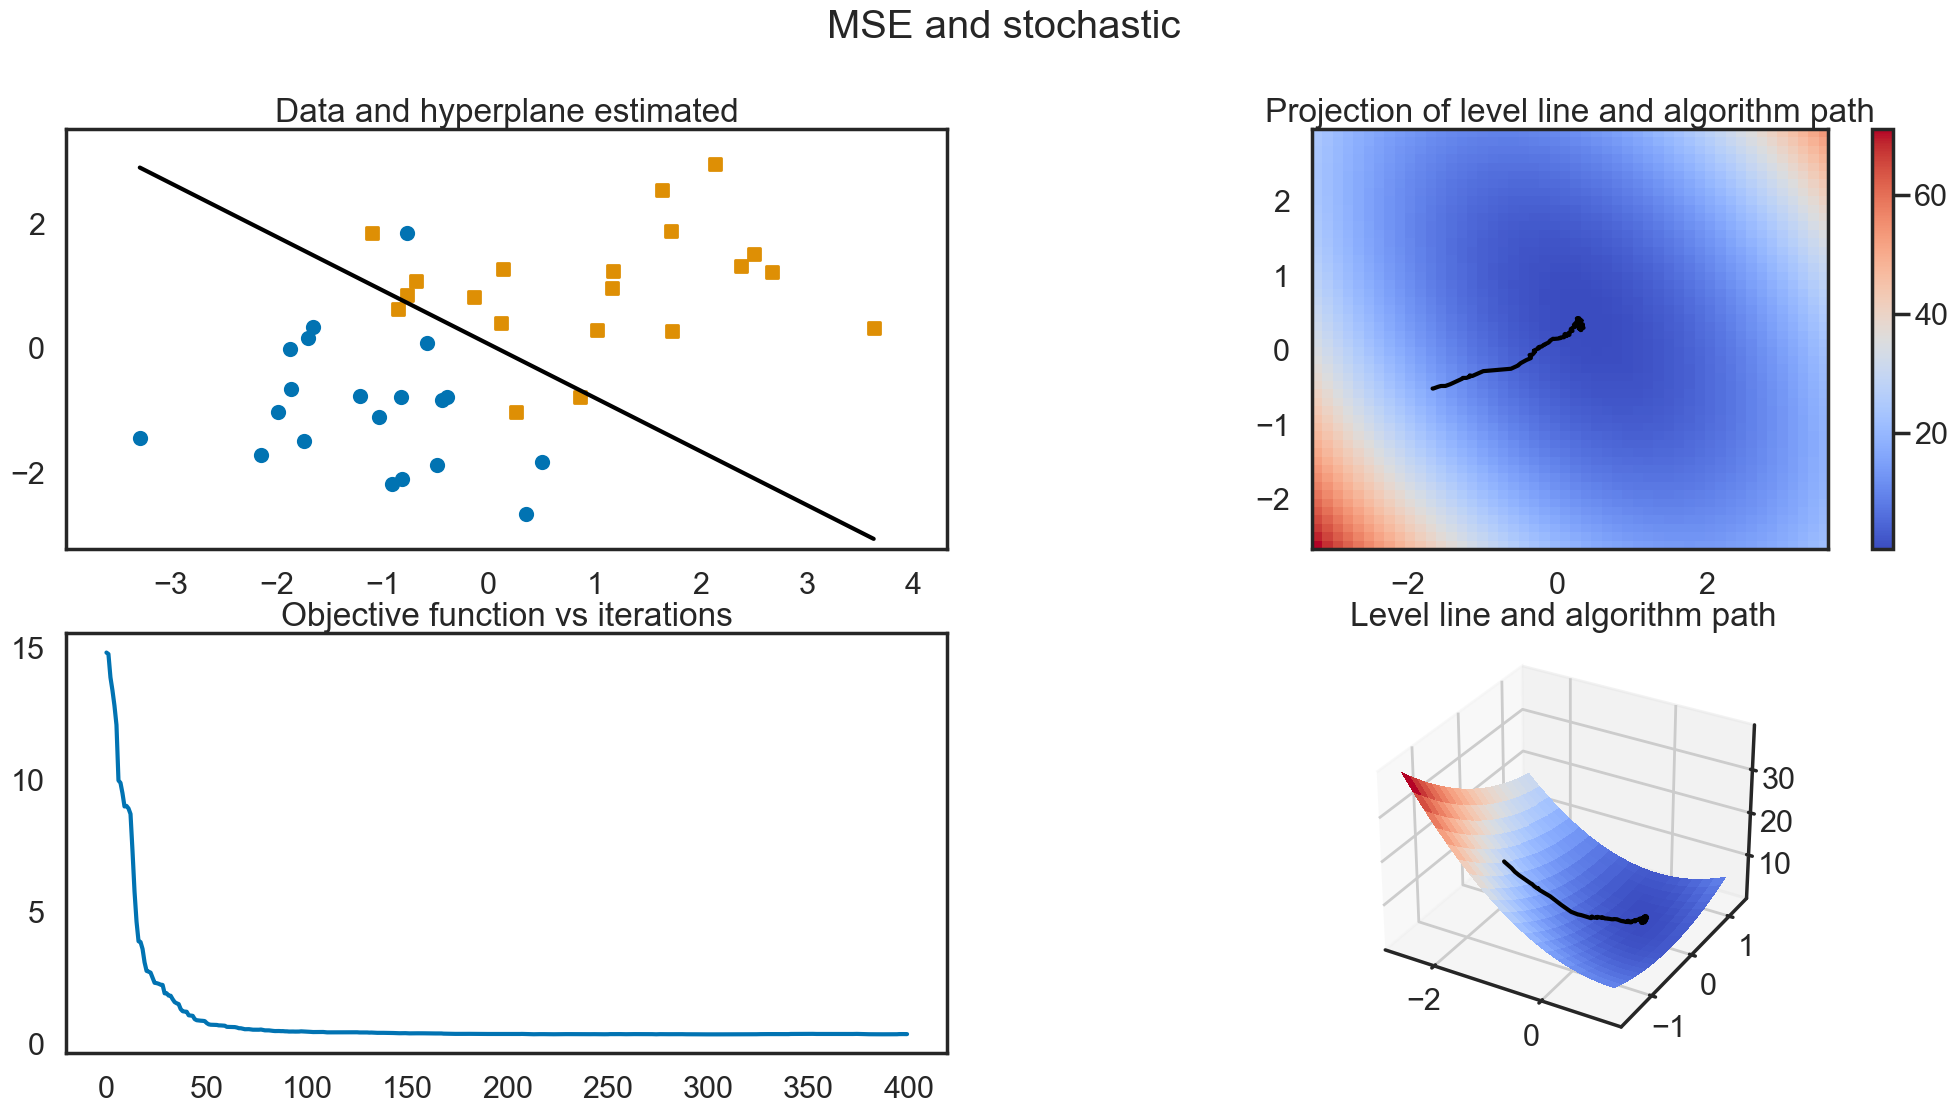

In [26]:
eps = 0.005
plt.figure(8, figsize=(25, 12))
plt.suptitle('MSE and stochastic')
wh_sto, costh_sto = gradient(X1, y1, eps, niter * len(y1), w_ini, loss_fun,
                             gr_lfun, stochastic=True)
plot_gradient(X1, y1, wh_sto, costh_sto, loss_fun)

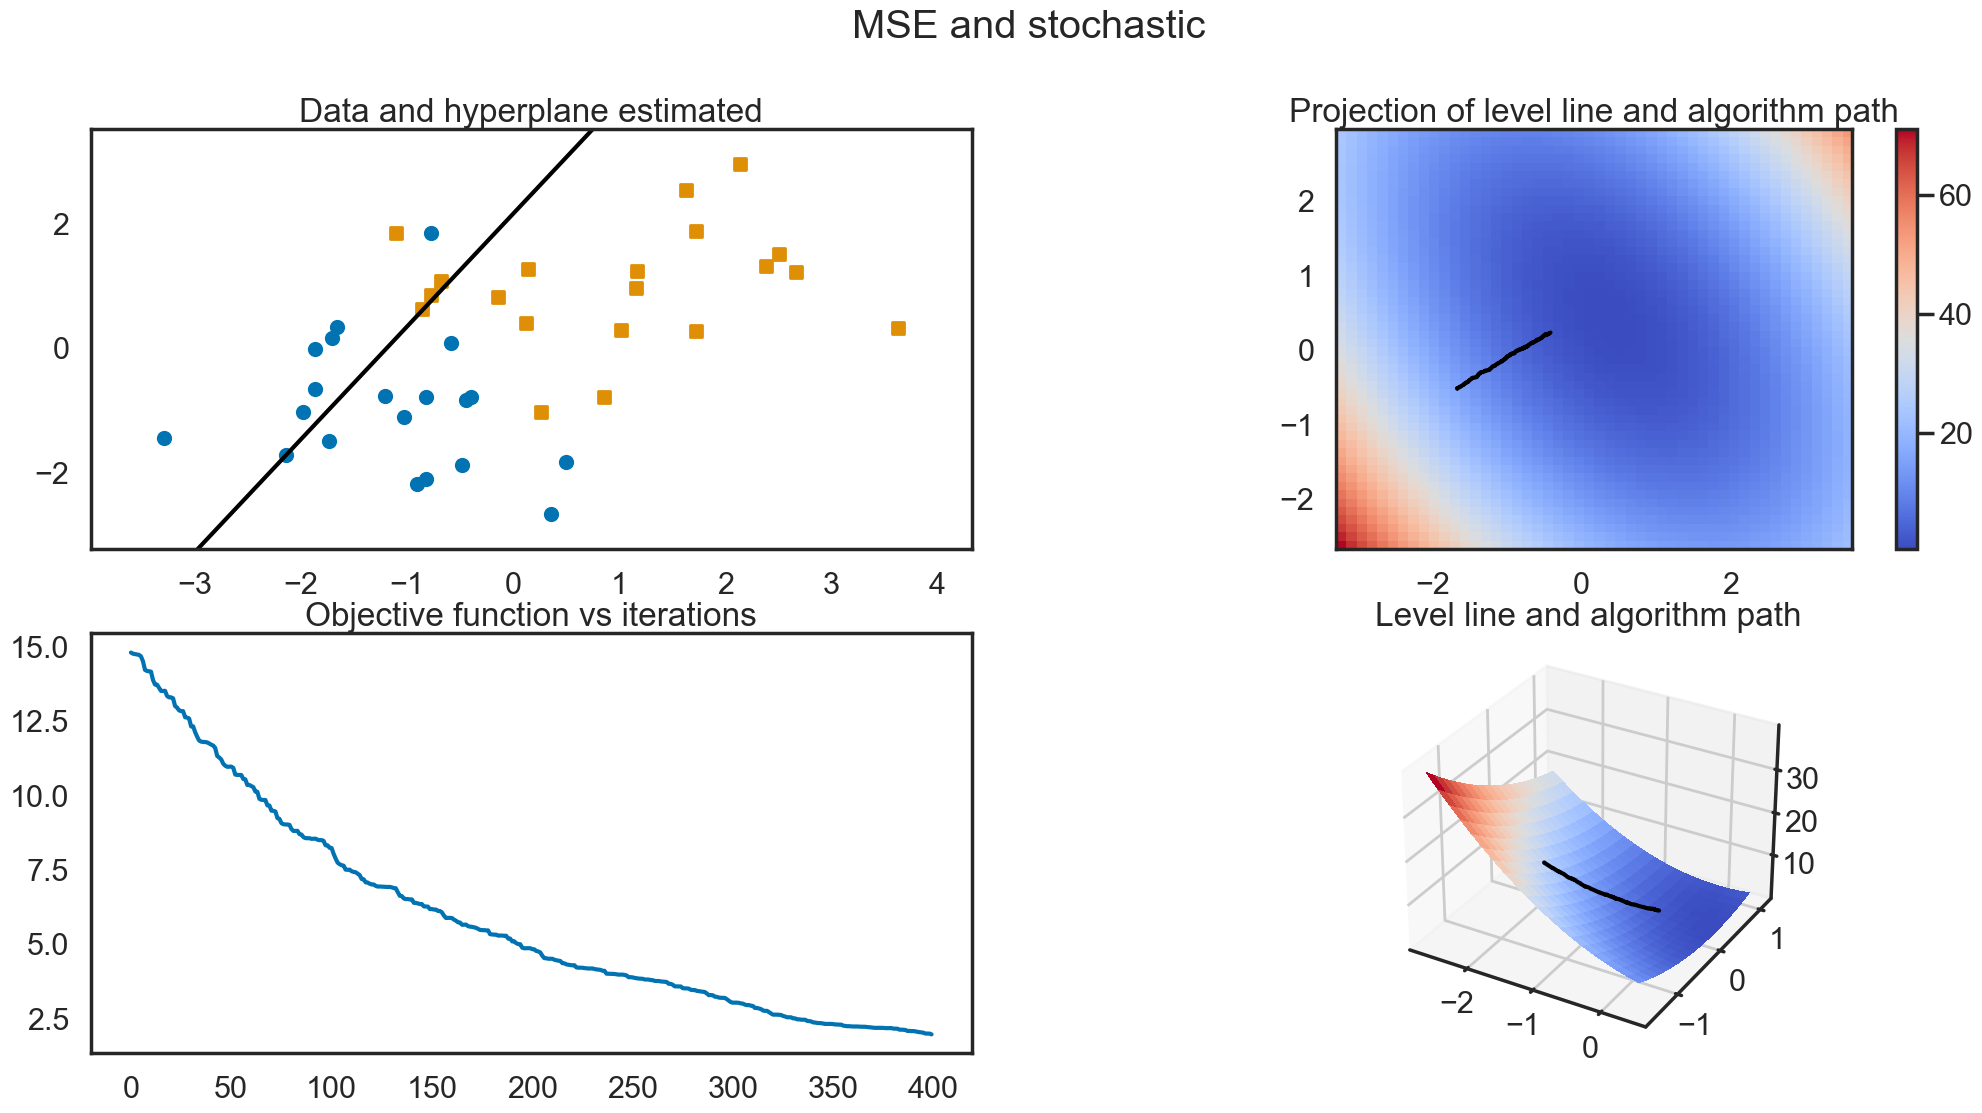

In [27]:
eps = 0.0005
plt.figure(8, figsize=(25, 12))
plt.suptitle('MSE and stochastic')
wh_sto, costh_sto = gradient(X1, y1, eps, niter * len(y1), w_ini, loss_fun,
                             gr_lfun, stochastic=True)
plot_gradient(X1, y1, wh_sto, costh_sto, loss_fun)

Quand on diminue le facteur multiplicatif de la descente,  l'évolution de la fonction objective est devenue lisse avec un accroissement du nombre d'itérations. 

### 6.1.2. Augmentation

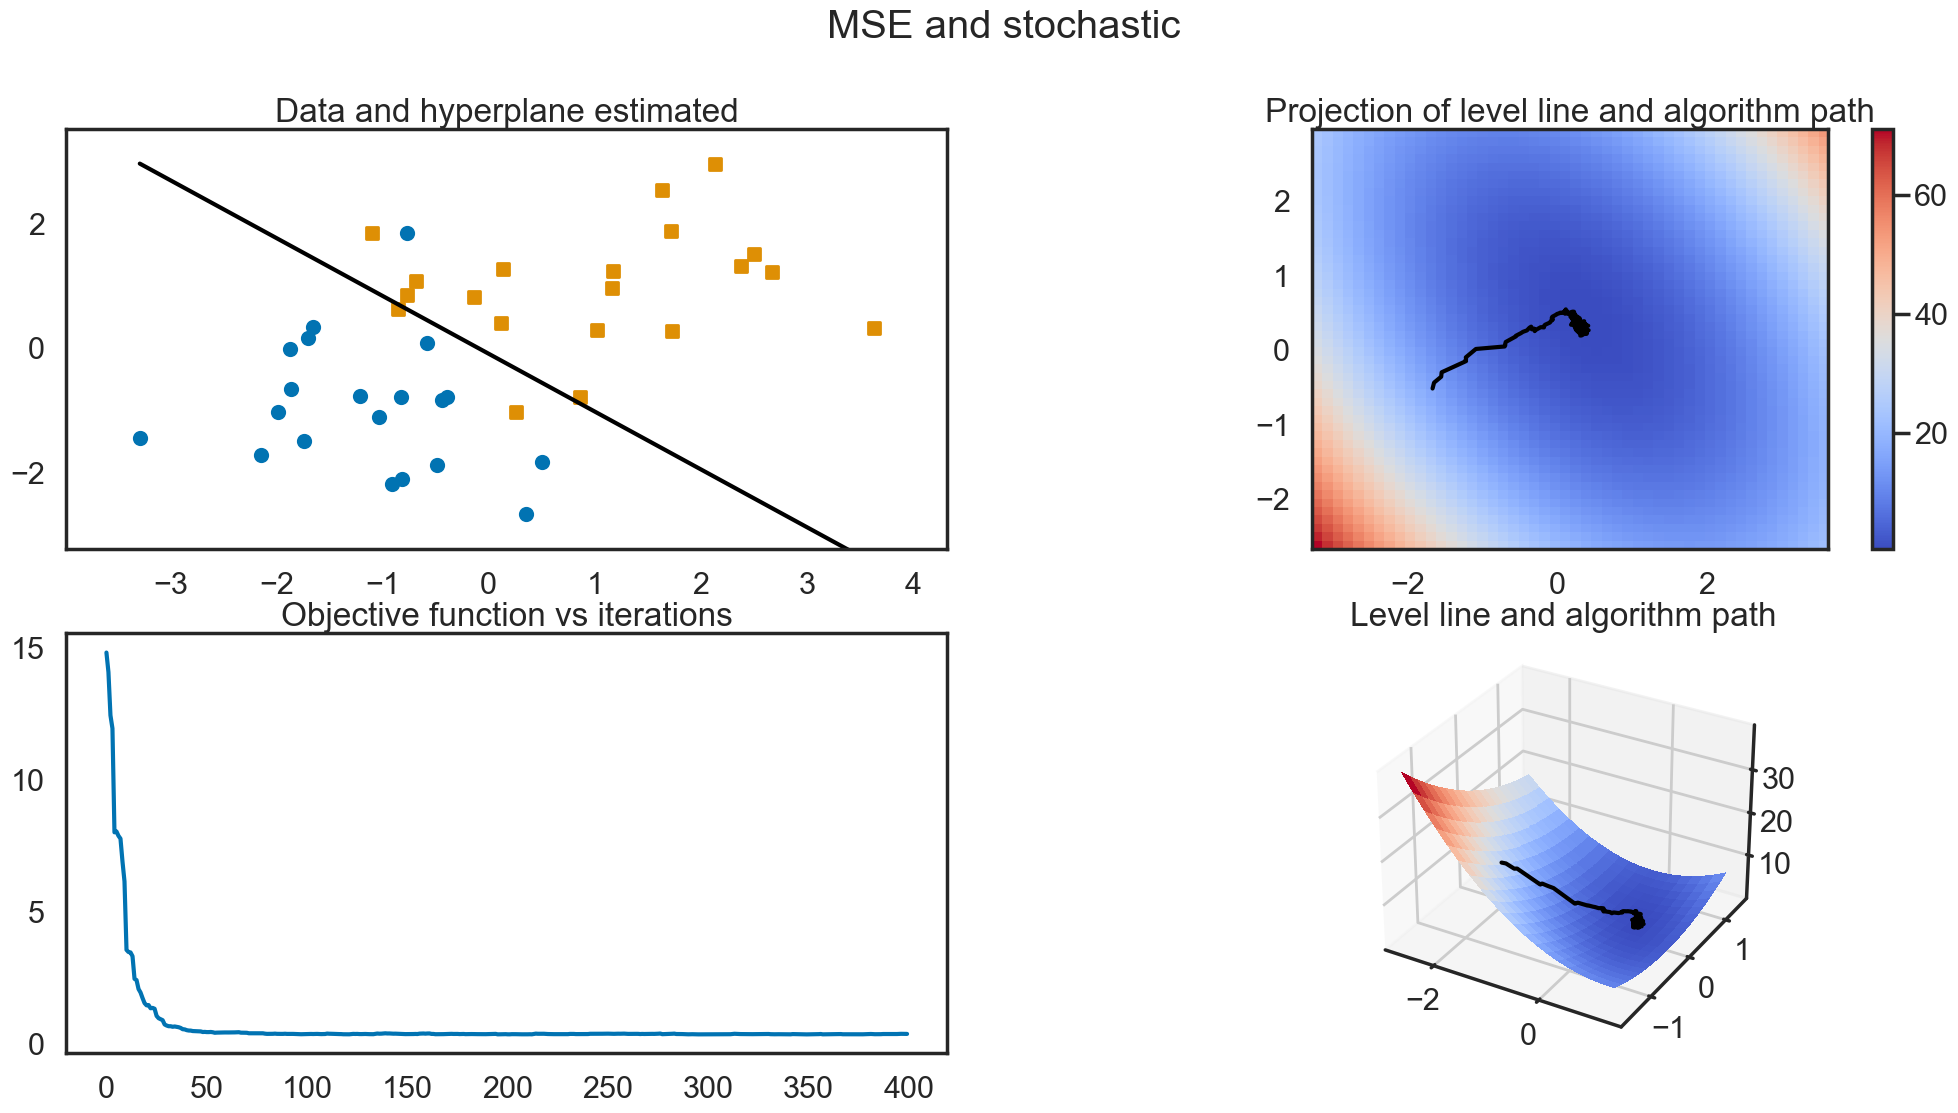

In [28]:
eps = 0.01
plt.figure(8, figsize=(25, 12))
plt.suptitle('MSE and stochastic')
wh_sto, costh_sto = gradient(X1, y1, eps, niter * len(y1), w_ini, loss_fun,
                             gr_lfun, stochastic=True)
plot_gradient(X1, y1, wh_sto, costh_sto, loss_fun)

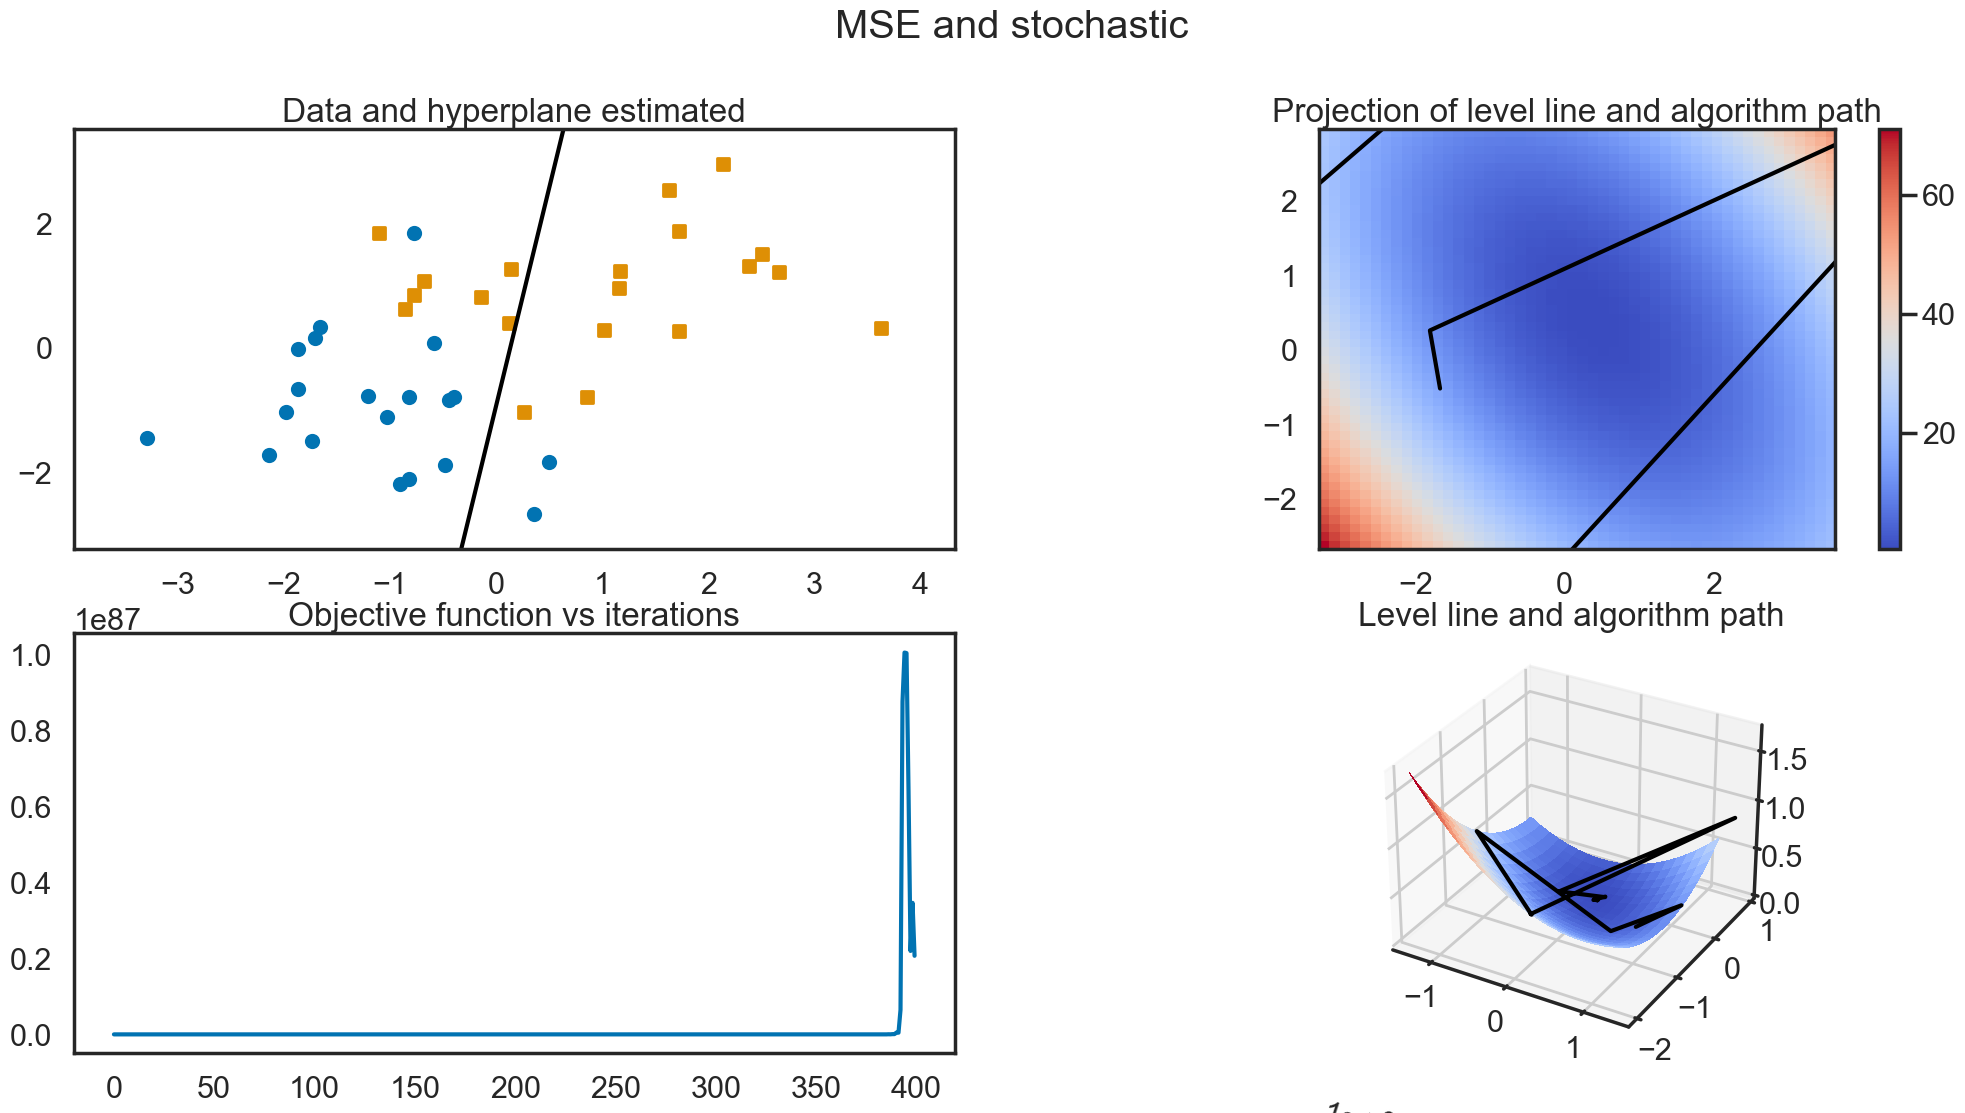

In [29]:
eps = 0.25
plt.figure(8, figsize=(25, 12))
plt.suptitle('MSE and stochastic')
wh_sto, costh_sto = gradient(X1, y1, eps, niter * len(y1), w_ini, loss_fun,
                             gr_lfun, stochastic=True)
plot_gradient(X1, y1, wh_sto, costh_sto, loss_fun)

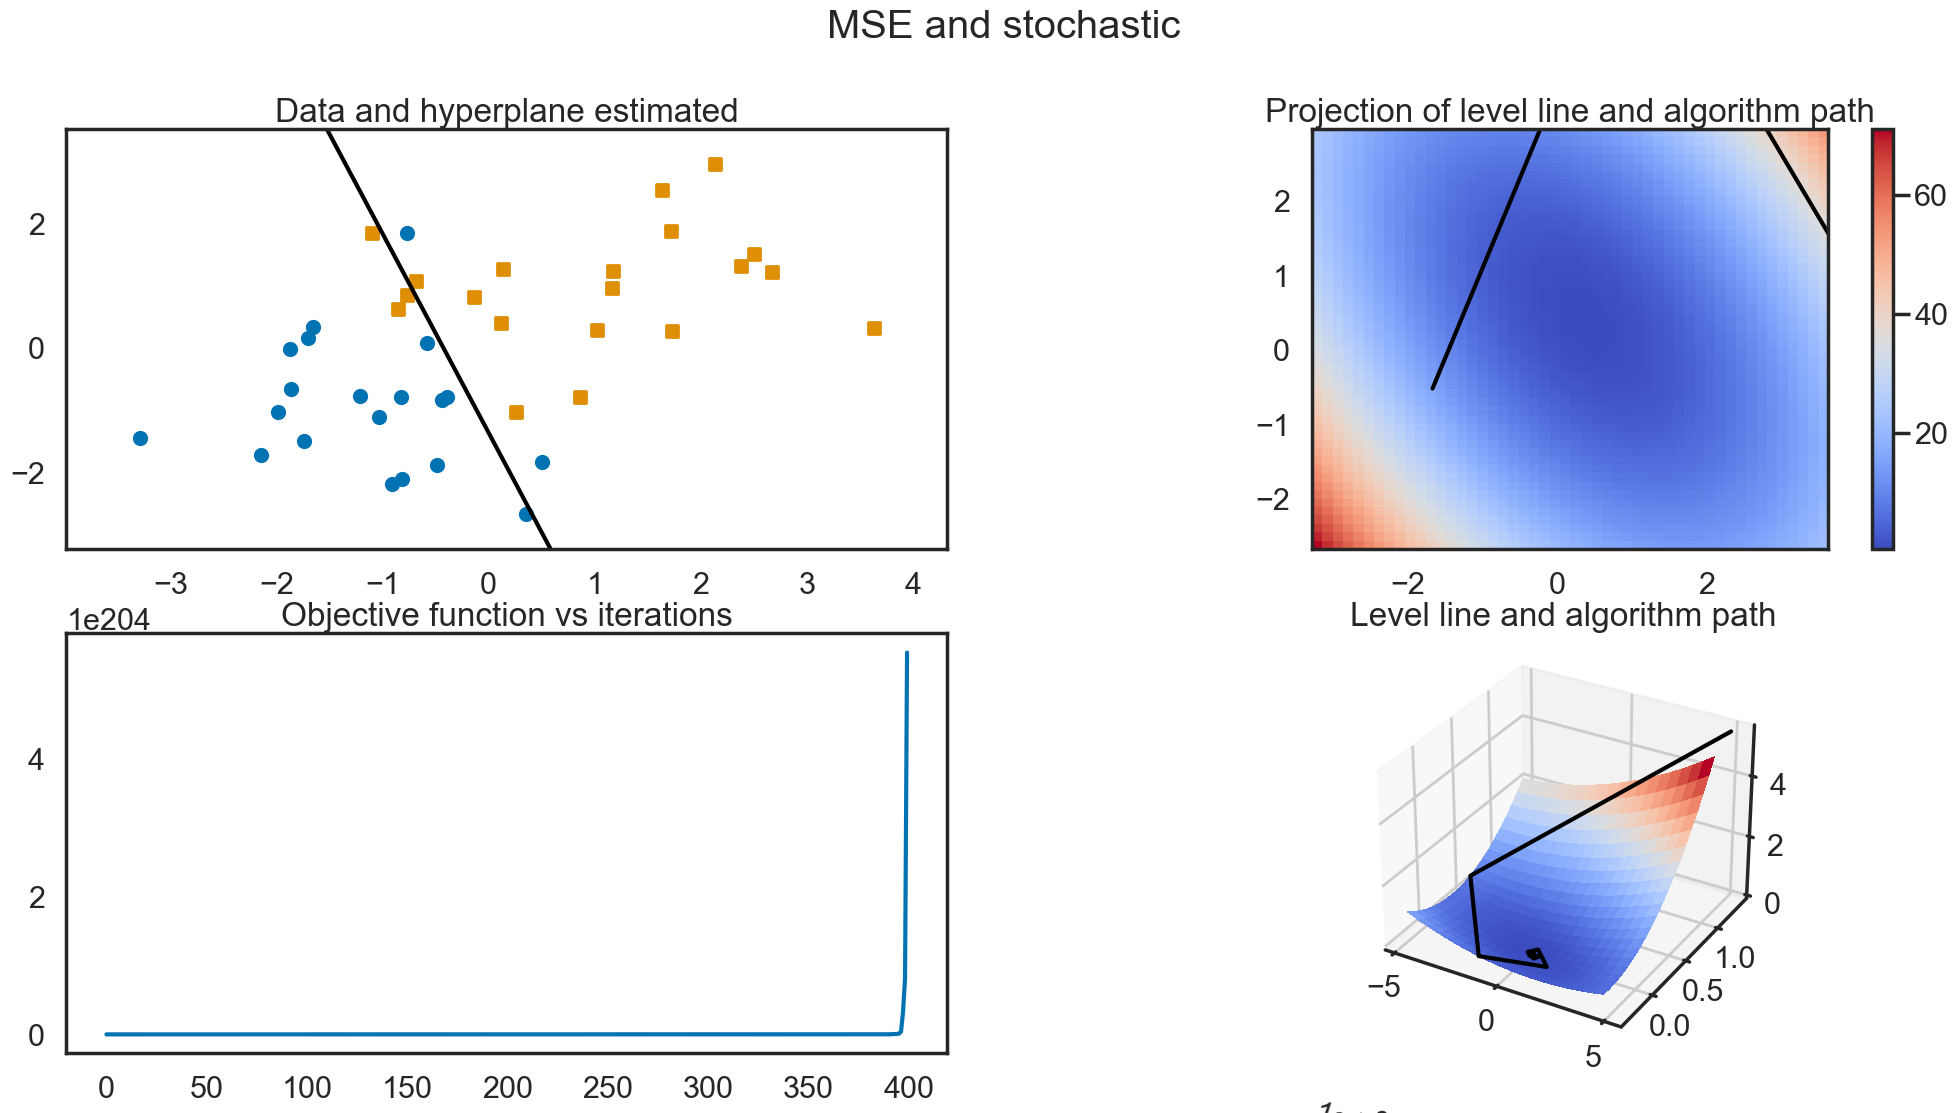

In [30]:
eps = 0.5
plt.figure(8, figsize=(25, 12))
plt.suptitle('MSE and stochastic')
wh_sto, costh_sto = gradient(X1, y1, eps, niter * len(y1), w_ini, loss_fun,
                             gr_lfun, stochastic=True)
plot_gradient(X1, y1, wh_sto, costh_sto, loss_fun)

C:\Users\Mita\anaconda3\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\Mita\Python_Telecom\Machine_learning\Perceptron de rosenbaltt\tp_perceptron_source.py:213: RuntimeWarning: overflow encountered in square
  return (y - predict(x, w)) ** 2
C:\Users\Mita\anaconda3\Lib\site-packages\mpl_toolkits\mplot3d\proj3d.py:180: RuntimeWarning: invalid value encountered in divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


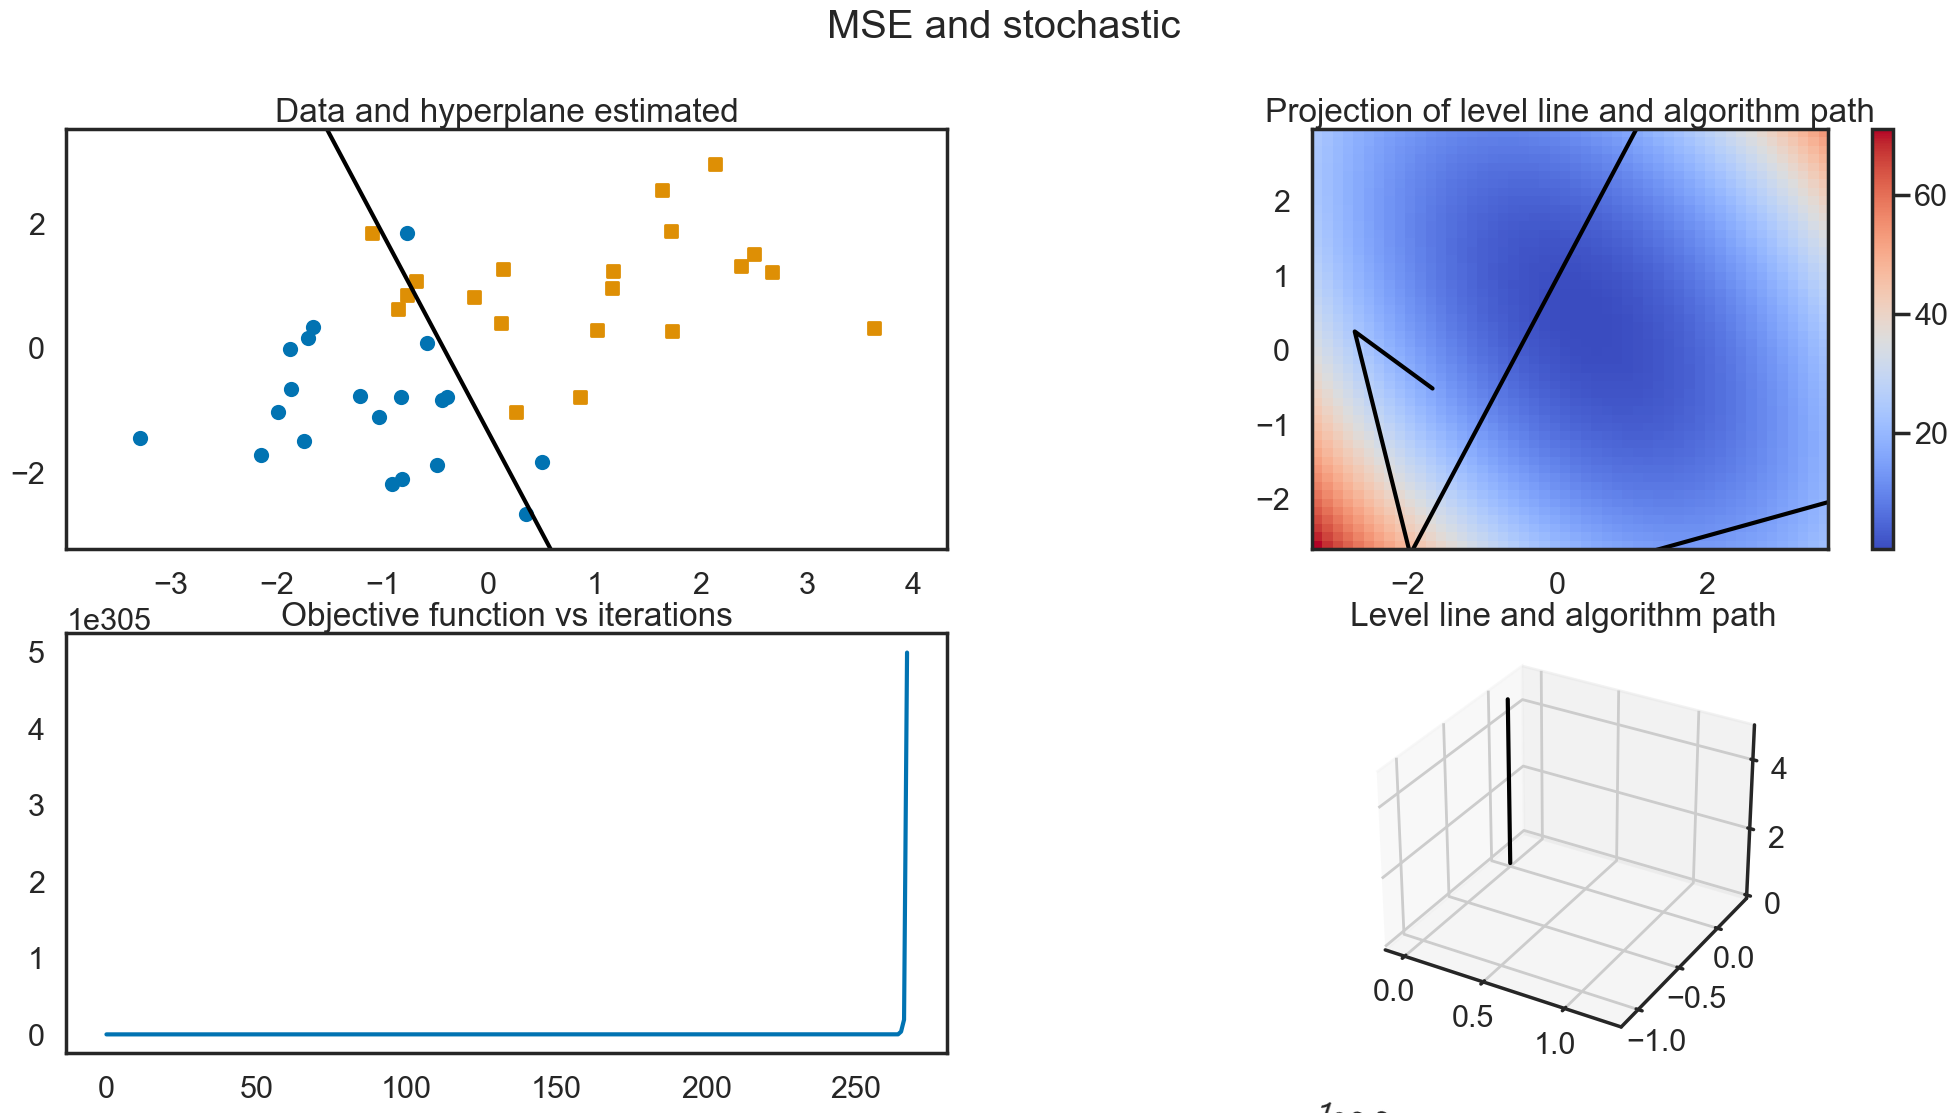

In [31]:
eps = 1
plt.figure(8, figsize=(25, 12))
plt.suptitle('MSE and stochastic')
wh_sto, costh_sto = gradient(X1, y1, eps, niter * len(y1), w_ini, loss_fun,
                             gr_lfun, stochastic=True)
plot_gradient(X1, y1, wh_sto, costh_sto, loss_fun)

Nous avons détecté un comportement étrange. Lorsqu'on augmente le facteur multiplicatif de la descente, à un certain seuil(alentour de 2.5), le nombre d'itération n'a plus de pouvoir d'amélioration de la performance du modèle. Pire, Si le nombre d'itération fait varier la performance, il le fait d'une manière négative. eps = 1 par exemple fait augmenter significativement la perte à partir de 400 itérations. 

Par ailleurs, plus on augmente le facteur multiplicatif, moins il y a de nombre d'itérations à franchir pour que la performance se dégrade. Dans un epsilone = 1, on n'a besoin que 300 itérations pour faire dégrader la performance.

Cette évolution n'a rien d'anormal si l'on revienne sur l'évolution de la courbe de la fonction perte en fonction des poids comme ici :  
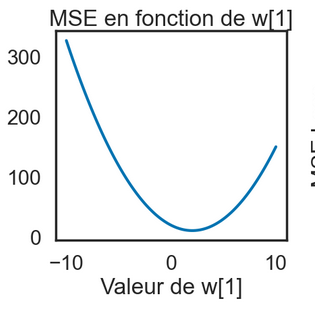
En effet, epsilone est le pas de l'itération tout au long de la courbe de fonction perte pour se converger jusqu'au minimum. Si epsilone est très grand, ce pas ne permet pas à l'algorithme de se converger. Le pas fait en sorte qu'on saute directement le minimum pour aller vers l'autre partie du graphe. Plus ce saut est élevé, plus il est facile d'aller vers des valeurs de la fonction objective plus élevé qu'on a vu auparavant.

En voyant cette évolution, il est tentant de penser qu'il fallait aussi simuler des valeurs très petites d'epsillone.

### 6.1.3 Retour à la diminution

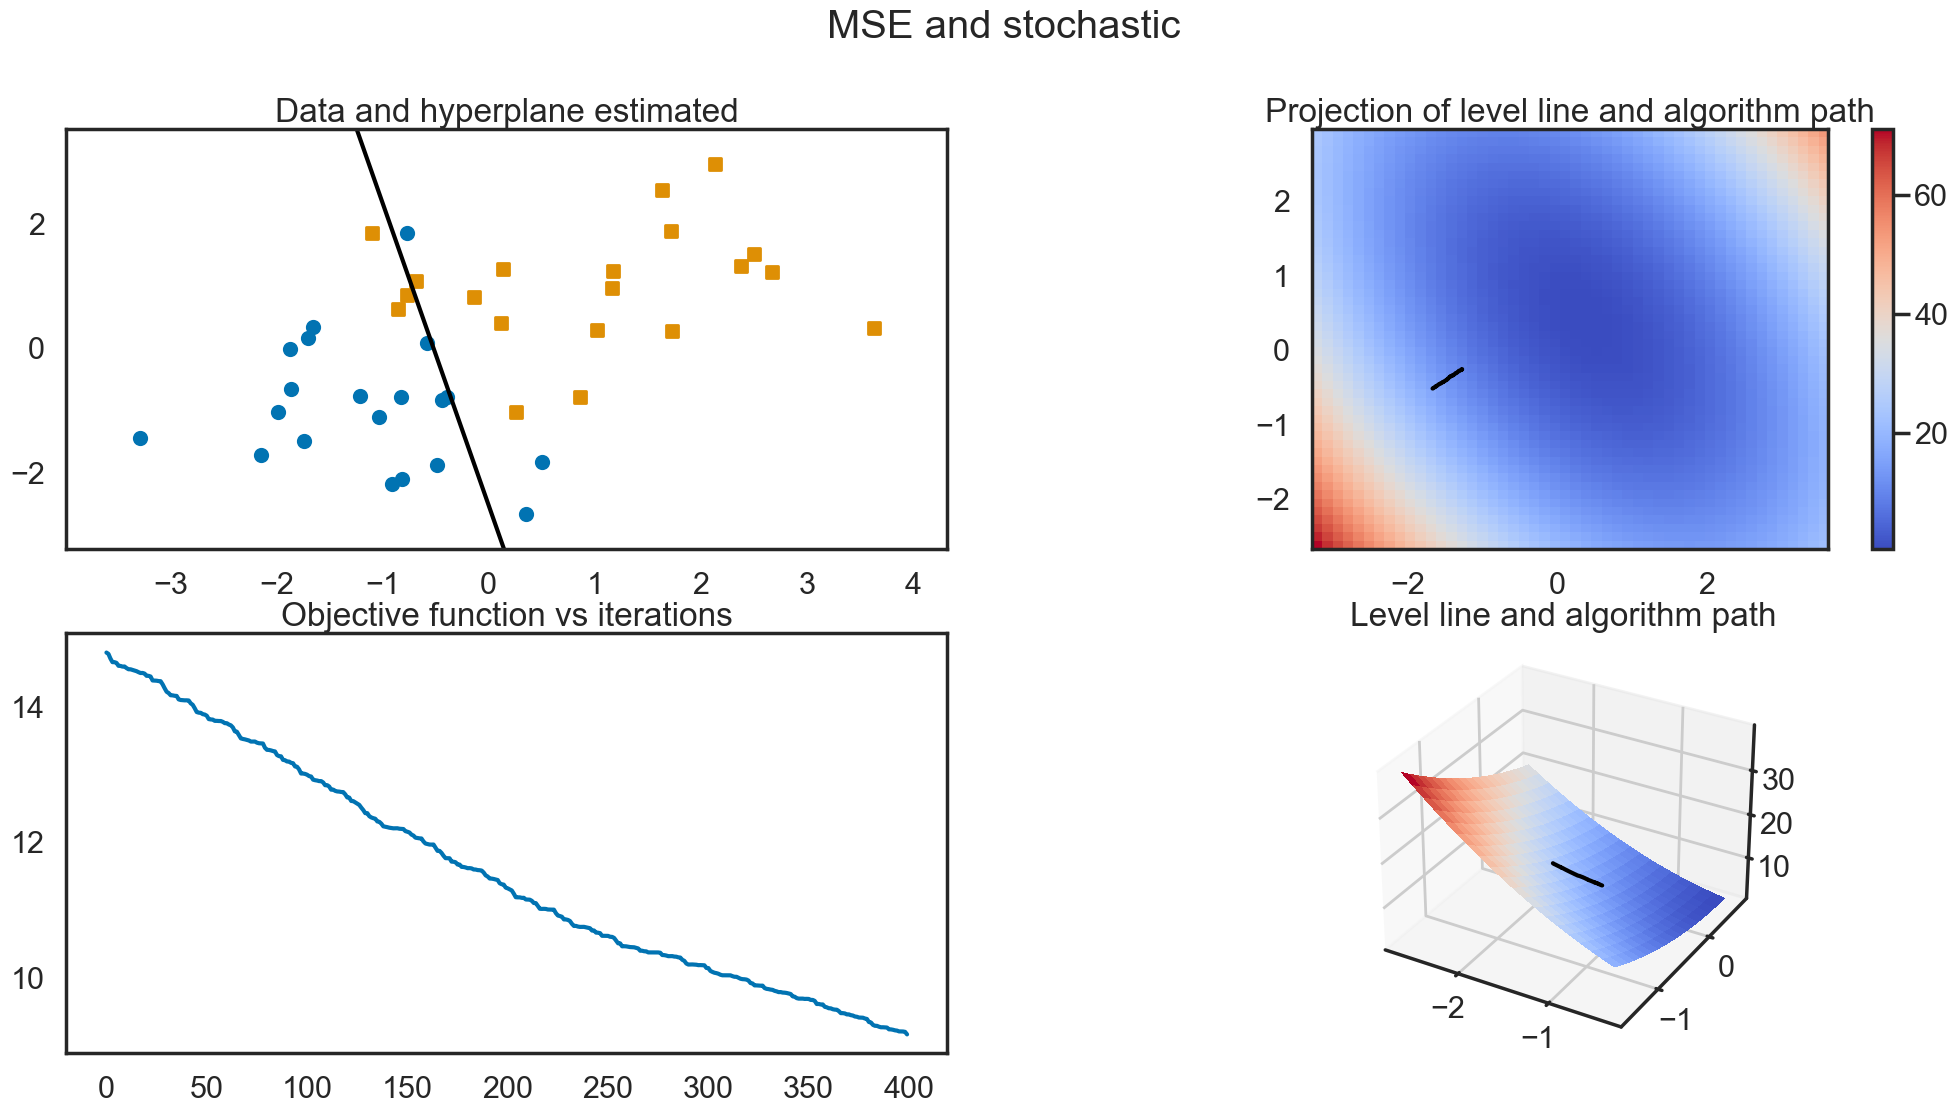

In [32]:
eps = 0.0001
plt.figure(8, figsize=(25, 12))
plt.suptitle('MSE and stochastic')
wh_sto, costh_sto = gradient(X1, y1, eps, niter * len(y1), w_ini, loss_fun,
                             gr_lfun, stochastic=True)
plot_gradient(X1, y1, wh_sto, costh_sto, loss_fun)

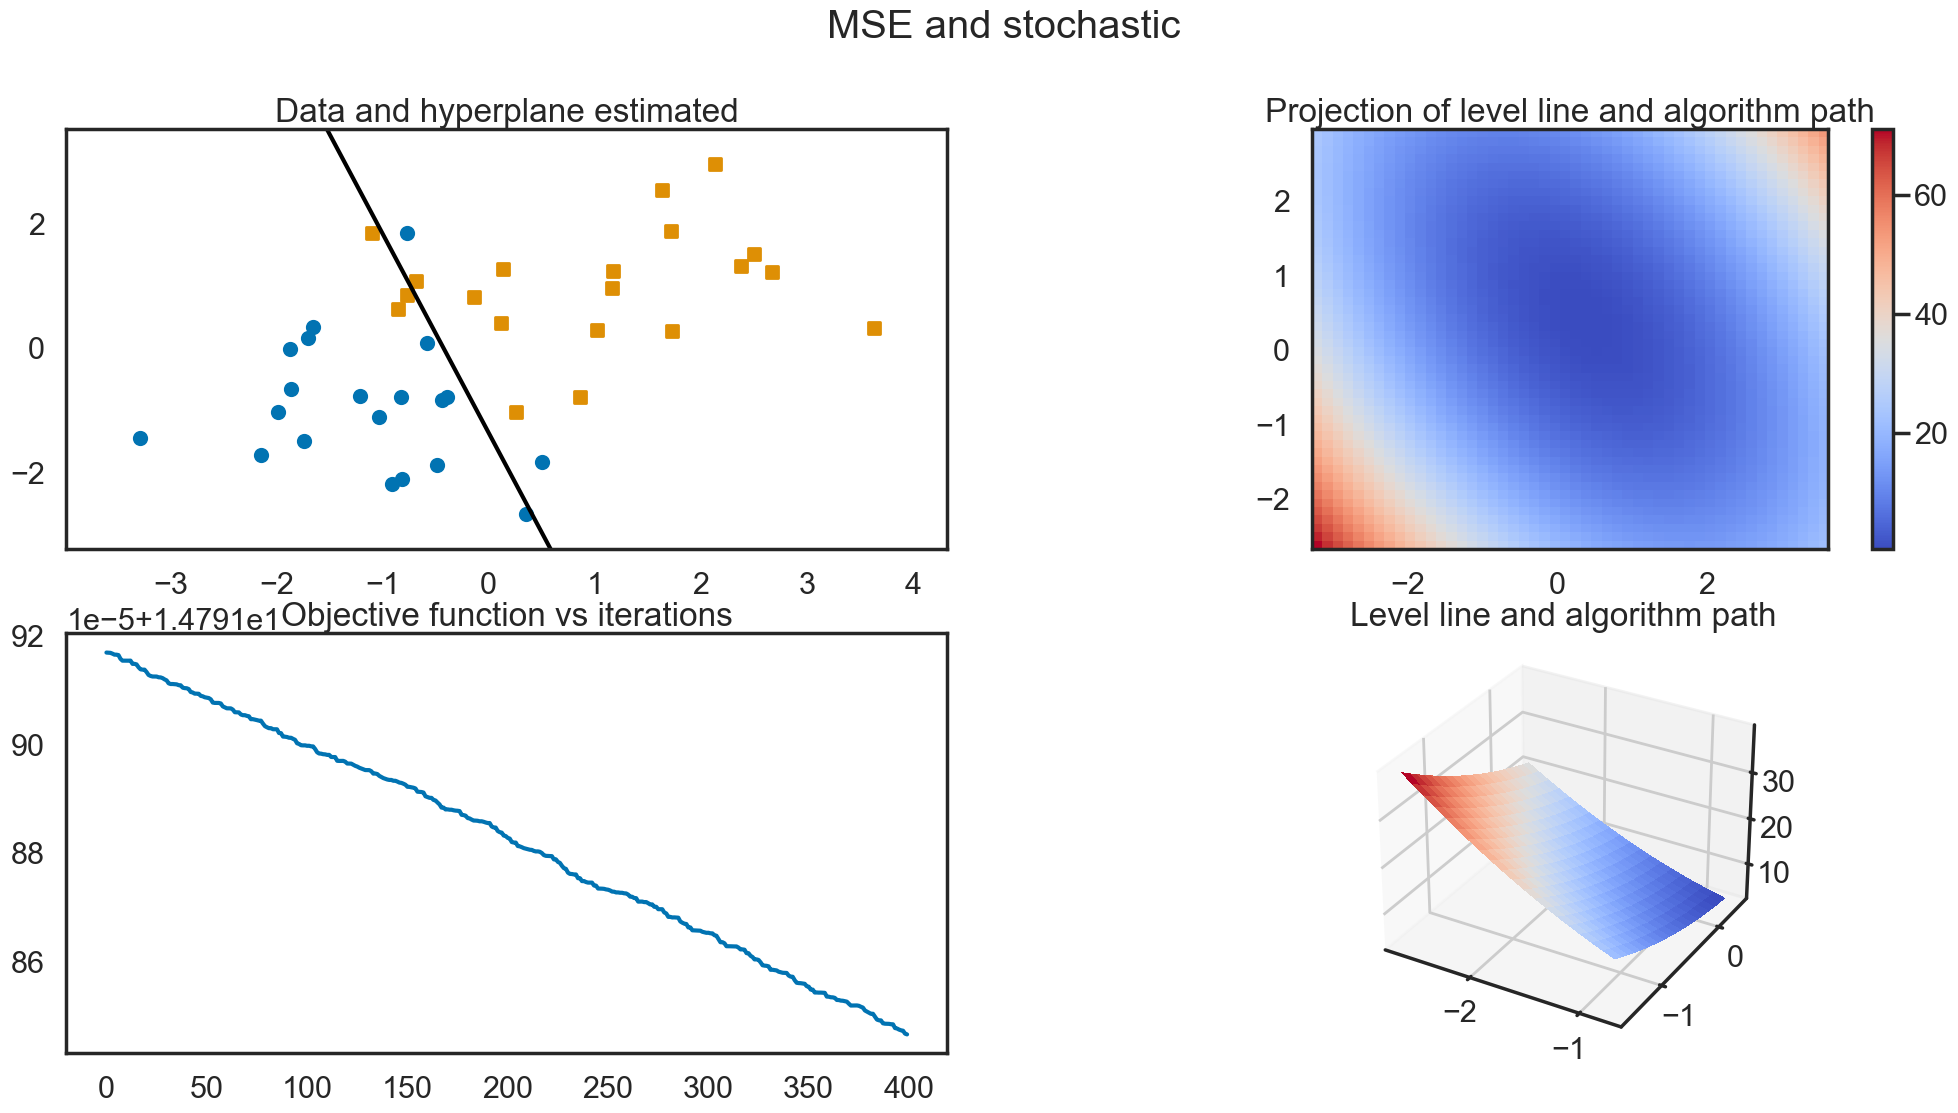

In [33]:
eps = 0.000000001
plt.figure(8, figsize=(25, 12))
plt.suptitle('MSE and stochastic')
wh_sto, costh_sto = gradient(X1, y1, eps, niter * len(y1), w_ini, loss_fun,
                             gr_lfun, stochastic=True)
plot_gradient(X1, y1, wh_sto, costh_sto, loss_fun)

Comme dans des valeurs très élevées de epsilone, il n'y a pas non plus une convergence à espérer dans le cas où epsilone est très faible. Pourtant, la raison est différent.

Lorsque le pas d'itération est très petit, il y a convergence dans un temps infini. Pratiquement, l'itération s'arrête à un moment donné. Elle devient juste un petit point dans l'espace de convergence.

Empiriquement, on a prouvé que le pas de descente est crucial dans le cadre du gradient descent stochastique. Il faut trouver le juste milieu pour ne pas rater le minimimum. Pas trop grand, pas trop petit, il faut un pas juste. Dans la pratique, on combine le grand pas et le petit pas pour sauter et gagner en précision après.

### 6.2. Simulation avec la difficulté de classification de données (nature des données)

#### 6.2.1.  Changement de données rand_bi_gauss

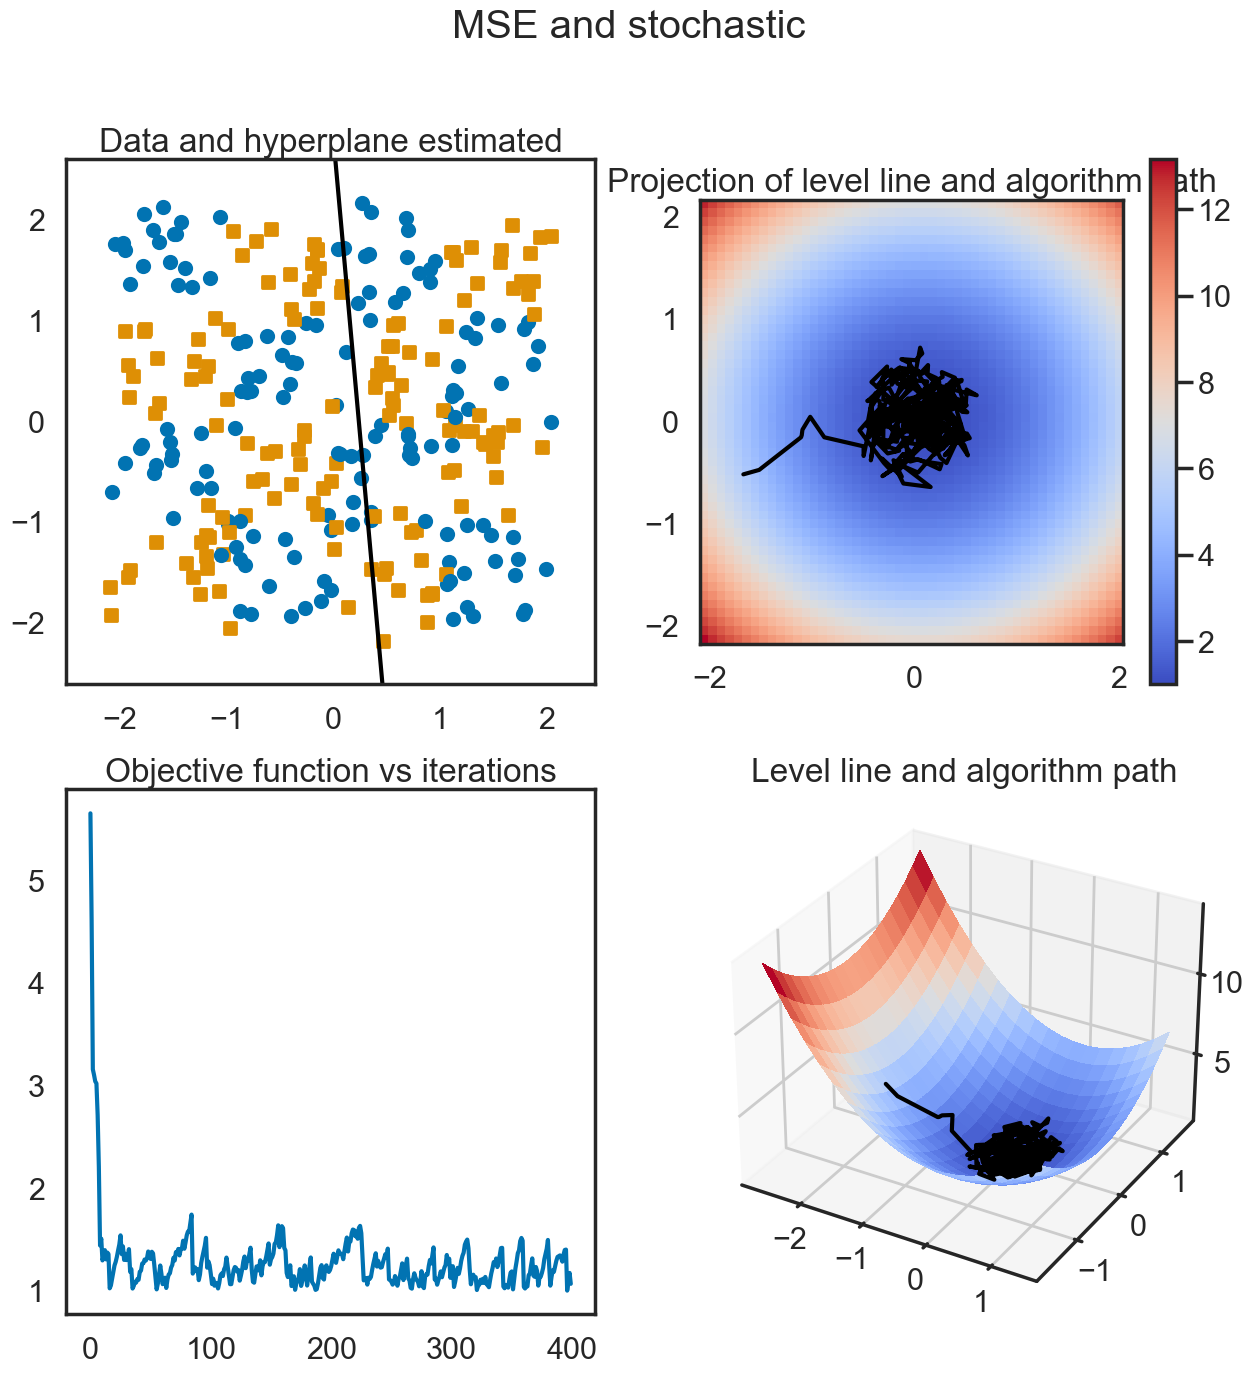

In [34]:
eps = 0.05
plt.figure(8, figsize=(15, 15))
plt.suptitle('MSE and stochastic')
wh_sto, costh_sto = gradient(X_chekers, Y_chekers, eps, niter * len(y1), w_ini, loss_fun,
                             gr_lfun, stochastic=True)
plot_gradient(X_chekers, Y_chekers, wh_sto, costh_sto, loss_fun)

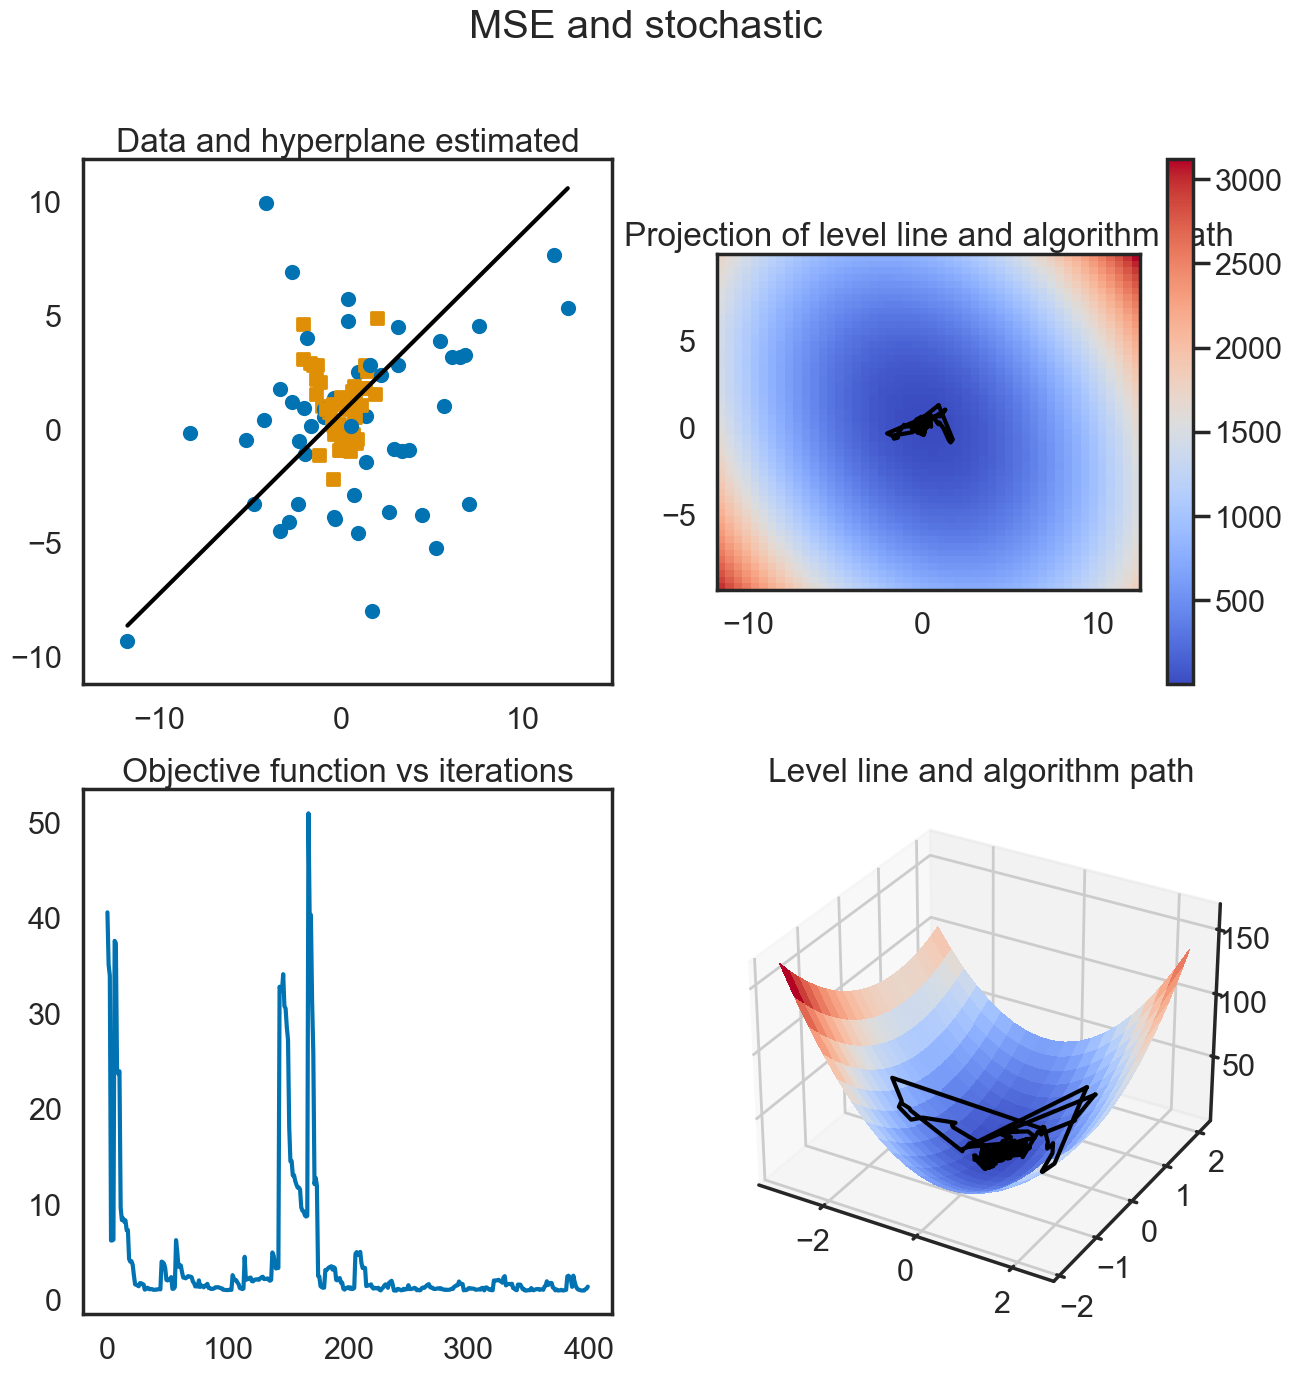

In [35]:
eps = 0.01
plt.figure(8, figsize=(15, 15))
plt.suptitle('MSE and stochastic')
wh_sto, costh_sto = gradient(X_clown, Y_clown, eps, niter * len(y1), w_ini, loss_fun,
                             gr_lfun, stochastic=True)
plot_gradient(X_clown, Y_clown, wh_sto, costh_sto, loss_fun)

Nous avons ici deux jeux de données dont les classes sont inséparables par une droite. Qu'est-ce qu'on observe? 

Nous voyons très bien que la droite ne sépare pas les deux classes. Leur valeur part dans tous les sens pour essayer de minimiser la fonction coût. Ce n'est pas au hasard s'il y a une échelle de variation notable dans les deux données. Dans les données chekers, on constate une variation entre 1.0 à 1.8. Dans les données clown, on voit une explosion de la fonction perte au départ et gardant une stabilité après. Il faut nuancer cette stabilité puisque la suite de la courbe n'est pas très visible après le pic. En voyant les autres sous-graphiques, on peut dire que la volatilité est la règle. 

Ce qui est étonnant c'est que l'algorithme arrive quand même à tracer une droite alors que les données ne sont s'y apprêtent pas. C'est possible puisque quelques soit le type de données à analyser, il y a toujours des valeurs de poids qui minimisent la fonction de décision. Algébriquement c'est correct mais graphiquement c'est loin d'être pertinent.

### 6.3. Simulation avec d'autres fonctions pertes

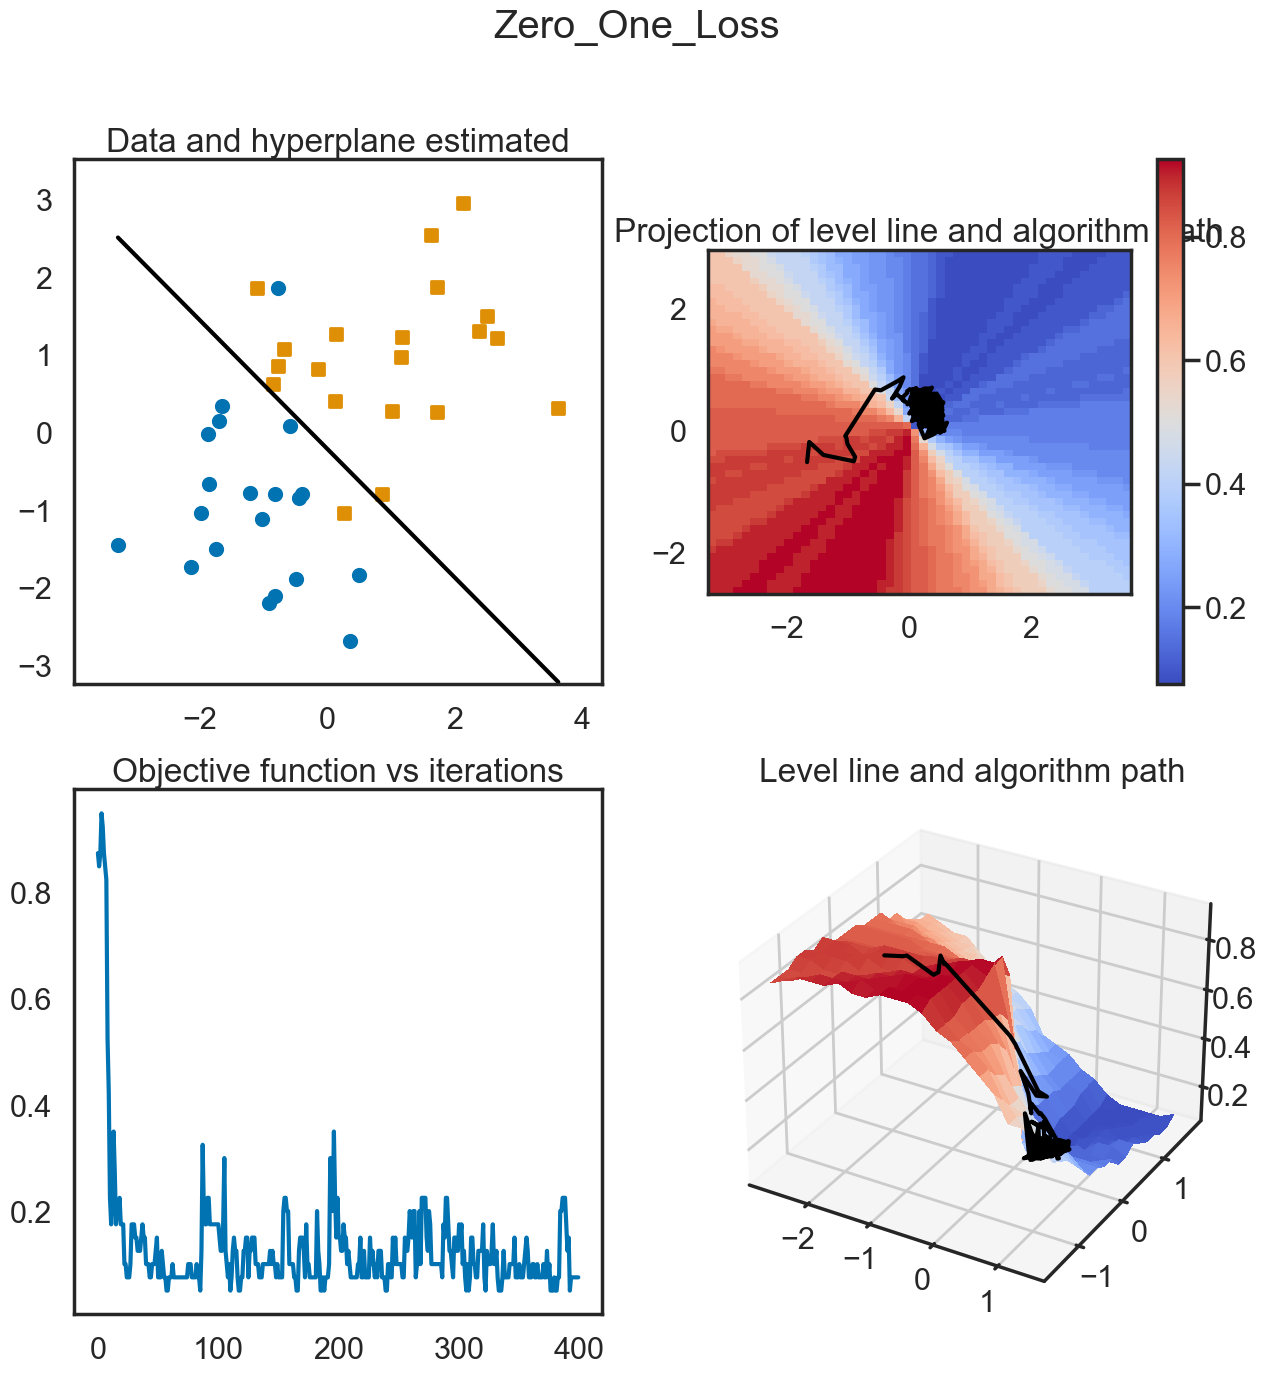

In [36]:
eps = 0.05
loss_fun = zero_one_loss
plt.figure(8, figsize=(15, 15))
plt.suptitle('Zero_One_Loss')
wh_sto, costh_sto = gradient(X_bi_gauss, Y_bi_gauss, eps, niter * len(y1), w_ini, loss_fun,
                             gr_lfun, stochastic=True)
plot_gradient(X_bi_gauss, Y_bi_gauss, wh_sto, costh_sto, loss_fun)

In [37]:
print(wh_sto)

[[-0.71178797 -1.66832948 -0.52087456]
 [-0.45166413 -1.63264974 -0.19096463]
 [-0.18122017 -1.40026119 -0.40358787]
 ...
 [ 0.06539398  0.29072654  0.44414616]
 [-0.0082992   0.41285695  0.41870154]
 [ 0.10162904  0.31860004  0.48775551]]


On arrive à une même séparation que dans la méthode MSE. Par contre, la manière d'y arriver est totalement divergent.
Par rapport à l'évolution des poids, on voit qu'il y ne changent pas beaucoup (sous-graphique 2). Dans le MSE, l'échelle est très grand pour capturer leur variation (0 à 50) alors qu'ici on a une échelle très faible (0 à 0.8). En conséquence, la valeur de la fonction objective l'est aussi.
S'agissant de la fonction objective, sa variation est constante par morceaux. C'est normal car l'évolution de la fonction objective en fonction de de chaque poids en est ainsi :  
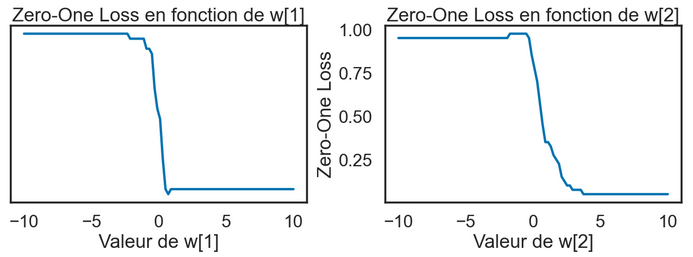
L'évolution de la fonction objective est constante par morceaux tout comme l'évolution de zero_one_loss.

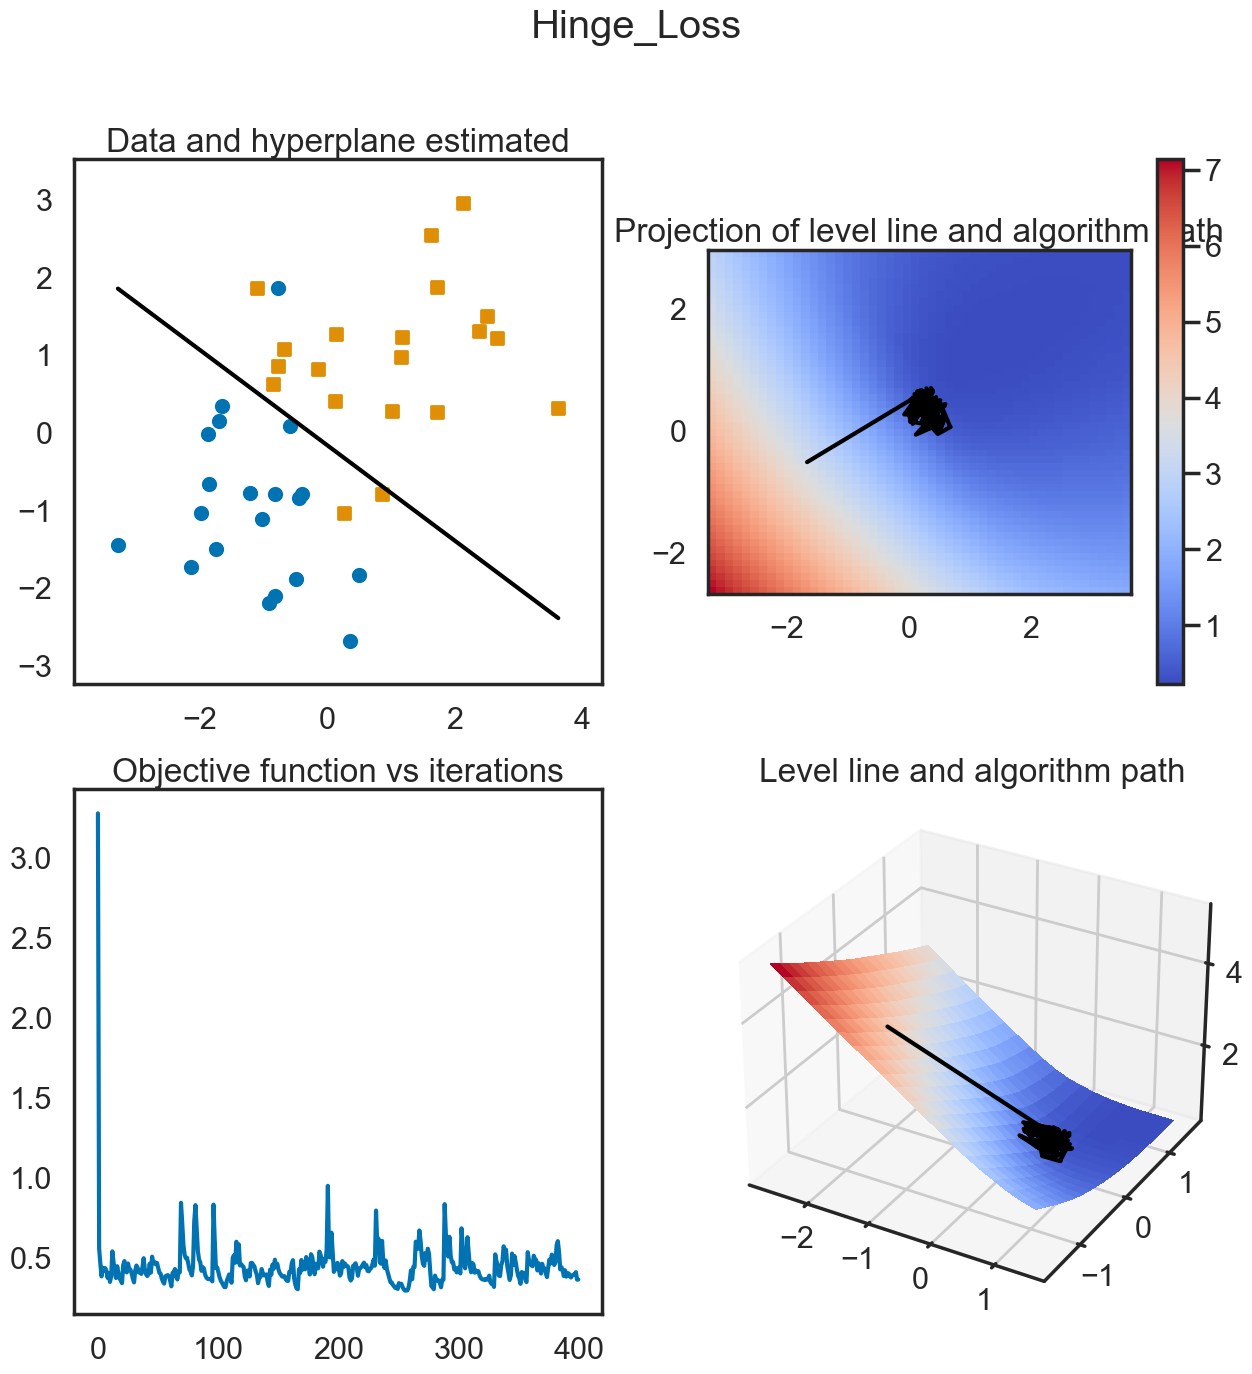

In [38]:
eps = 0.05
loss_fun = hinge_loss
plt.figure(8, figsize=(15, 15))
plt.suptitle('Hinge_Loss')
wh_sto, costh_sto = gradient(X_bi_gauss, Y_bi_gauss, eps, niter * len(y1), w_ini, loss_fun,
                             gr_lfun, stochastic=True)
plot_gradient(X_bi_gauss, Y_bi_gauss, wh_sto, costh_sto, loss_fun)

On s'attend à une évolution semblable à MSE. Chose faite.

#### Question : pourquoi pas linéaire par morceaux? 

## 7. Etude de l'algorithme de descente gradient classique

### 7.1. simulation du facteur multiplicatif de descente

#### 7.1.1. Diminution

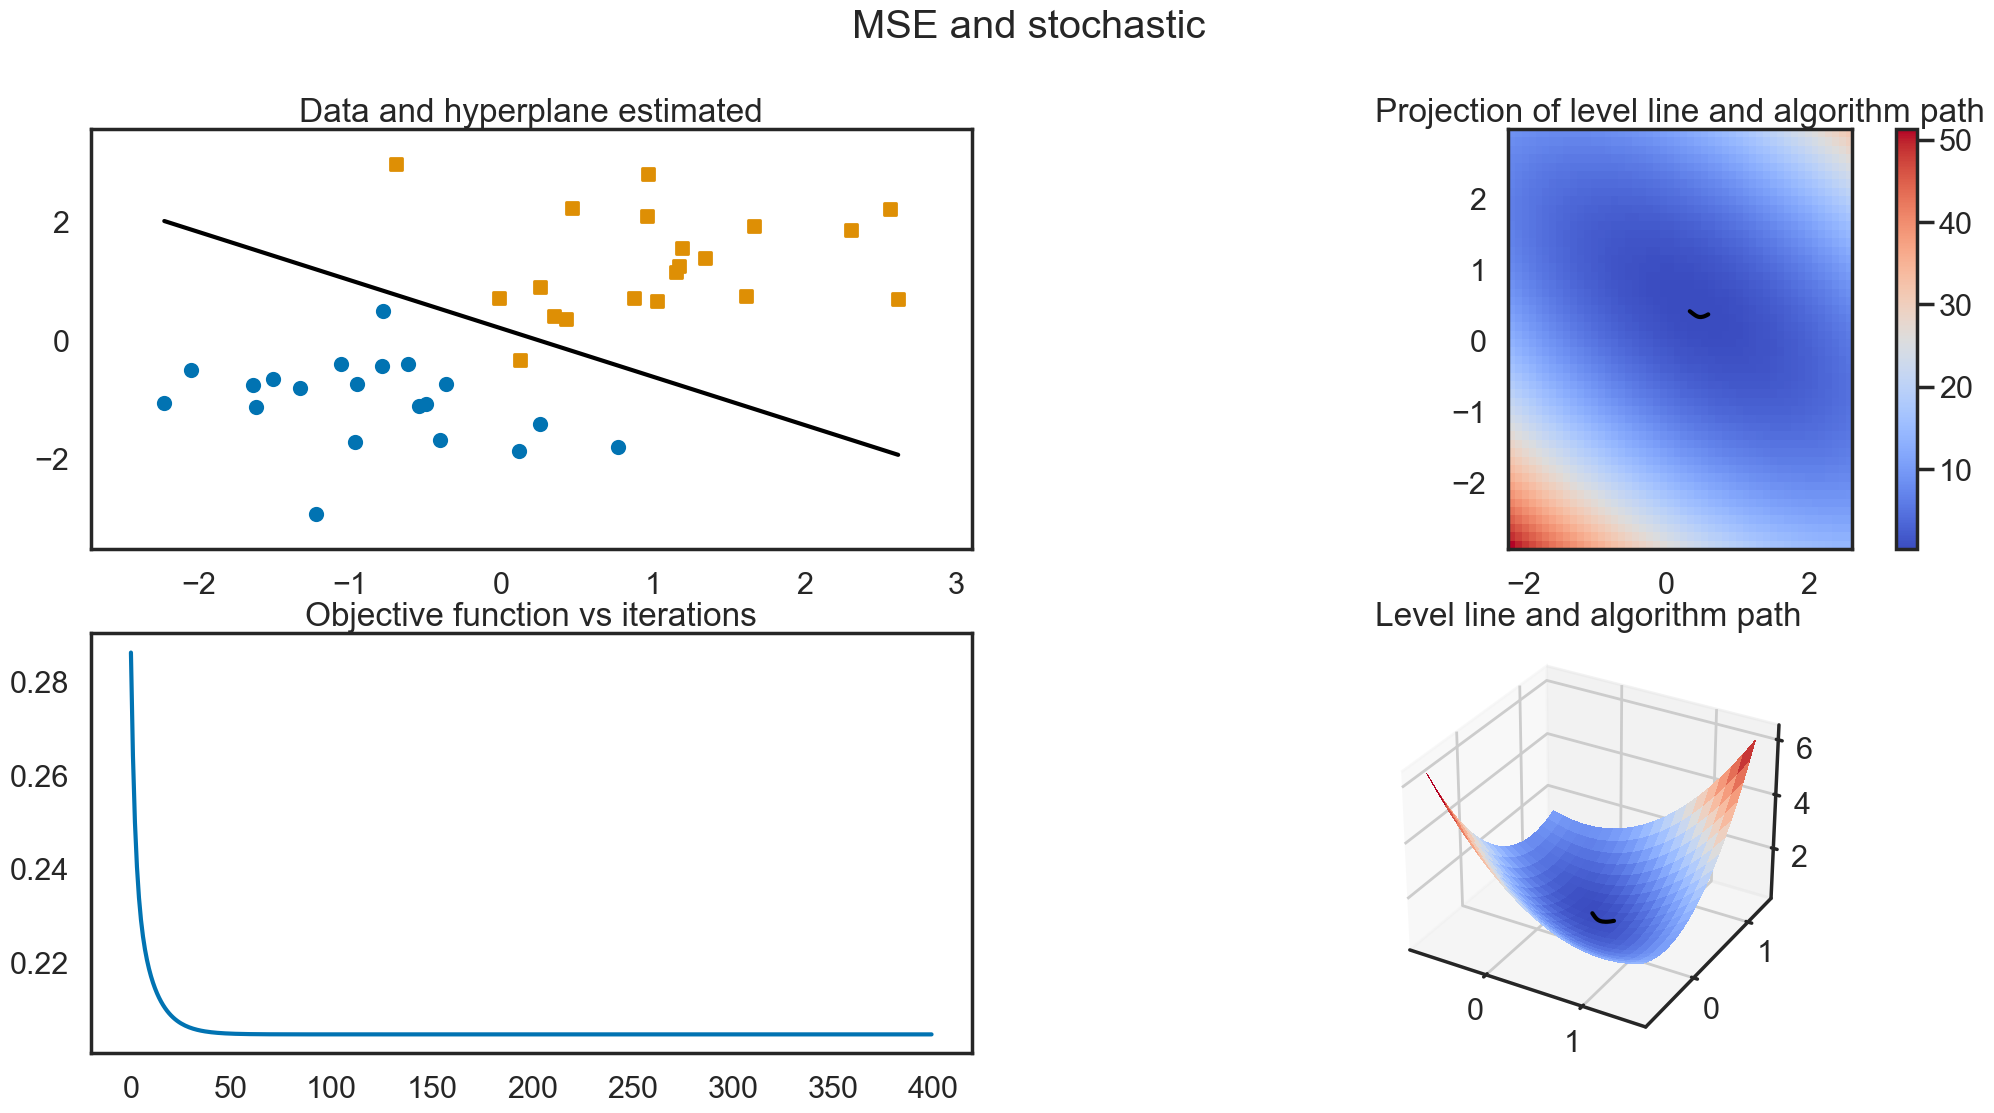

In [88]:
eps = 0.001
loss_fun = mse_loss
plt.figure(7, figsize=(25, 12))
plt.suptitle('MSE and stochastic')
wh_sto, costh_sto = gradient(X1, y1, eps, niter * len(y1), w_ini, loss_fun,
                             gr_lfun, stochastic=False)
plot_gradient(X1, y1, wh_sto, costh_sto, loss_fun)

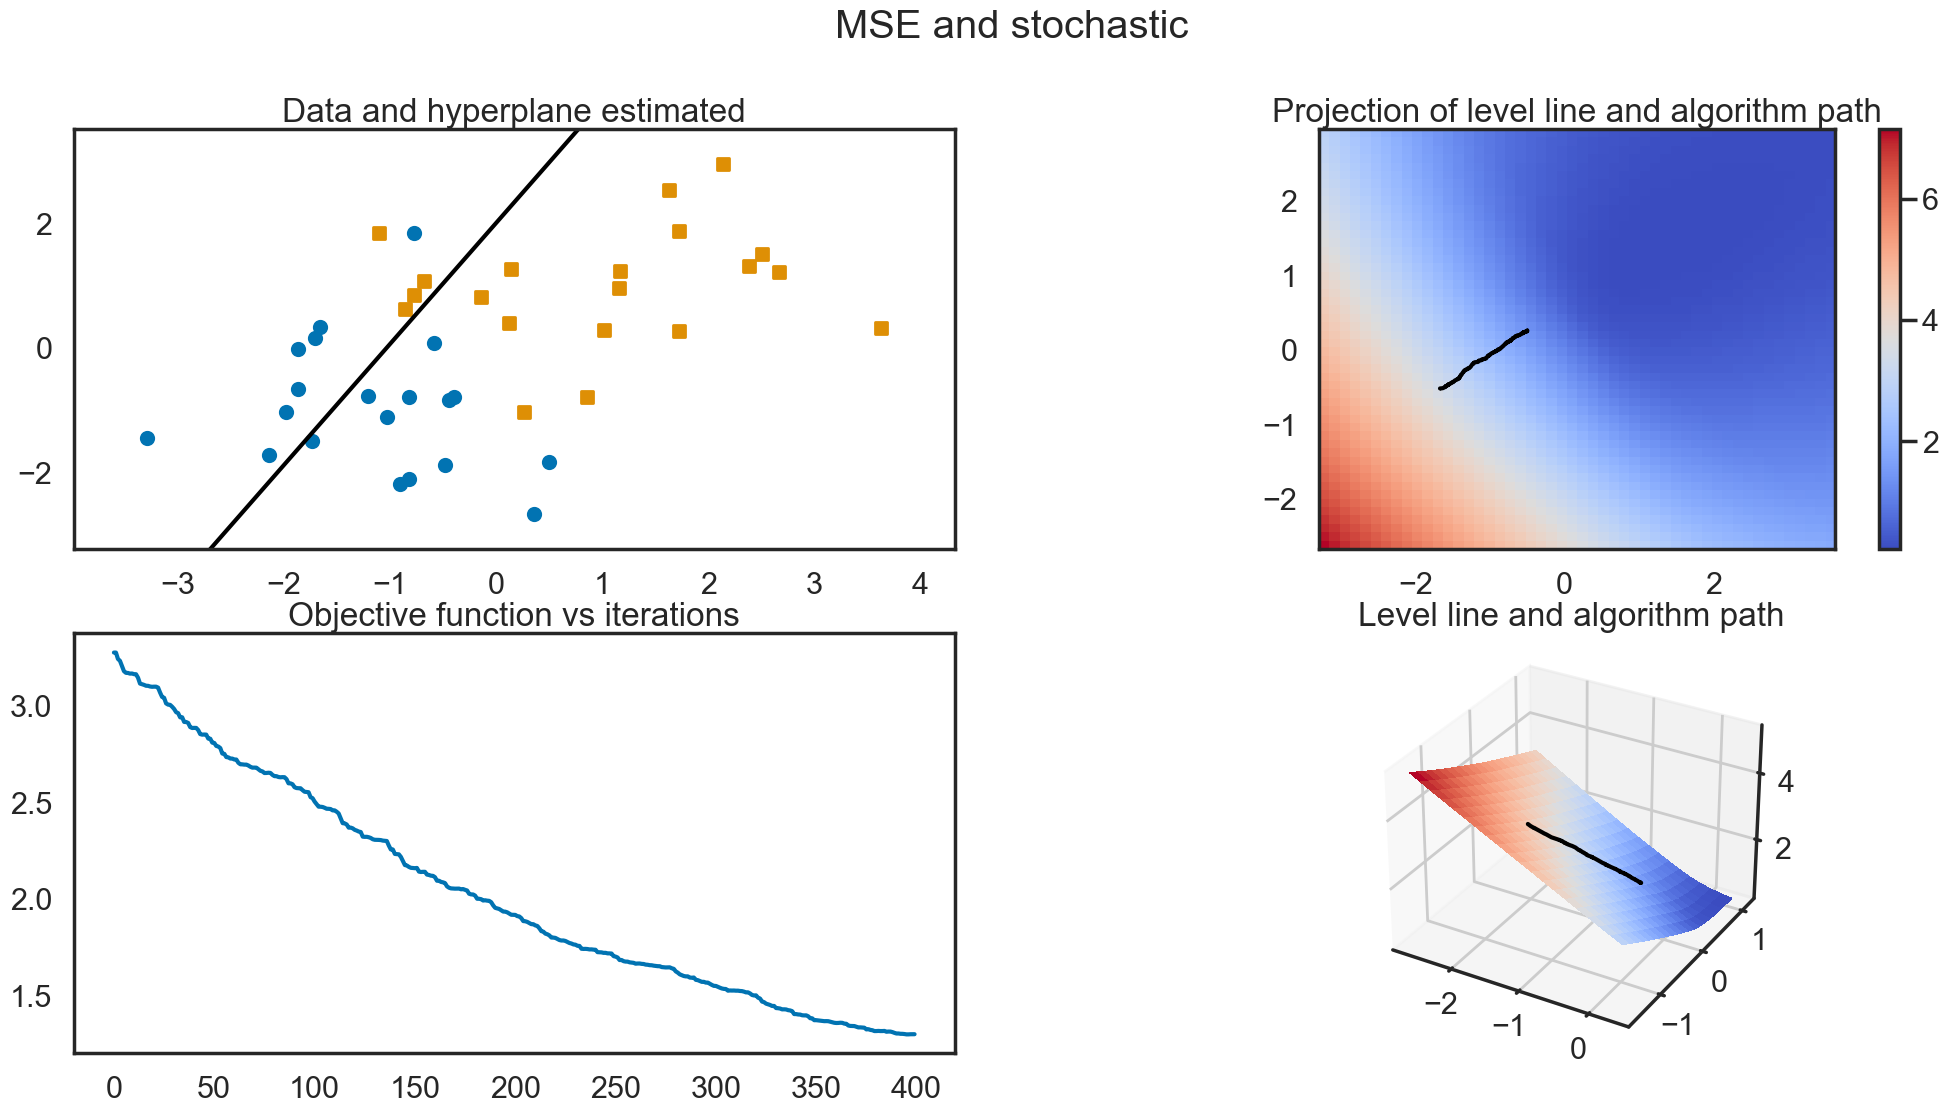

In [39]:
eps = 0.0005
plt.figure(8, figsize=(25, 12))
plt.suptitle('MSE and stochastic')
wh_sto, costh_sto = gradient(X1, y1, eps, niter * len(y1), w_ini, loss_fun,
                             gr_lfun, stochastic=True)
plot_gradient(X1, y1, wh_sto, costh_sto, loss_fun)

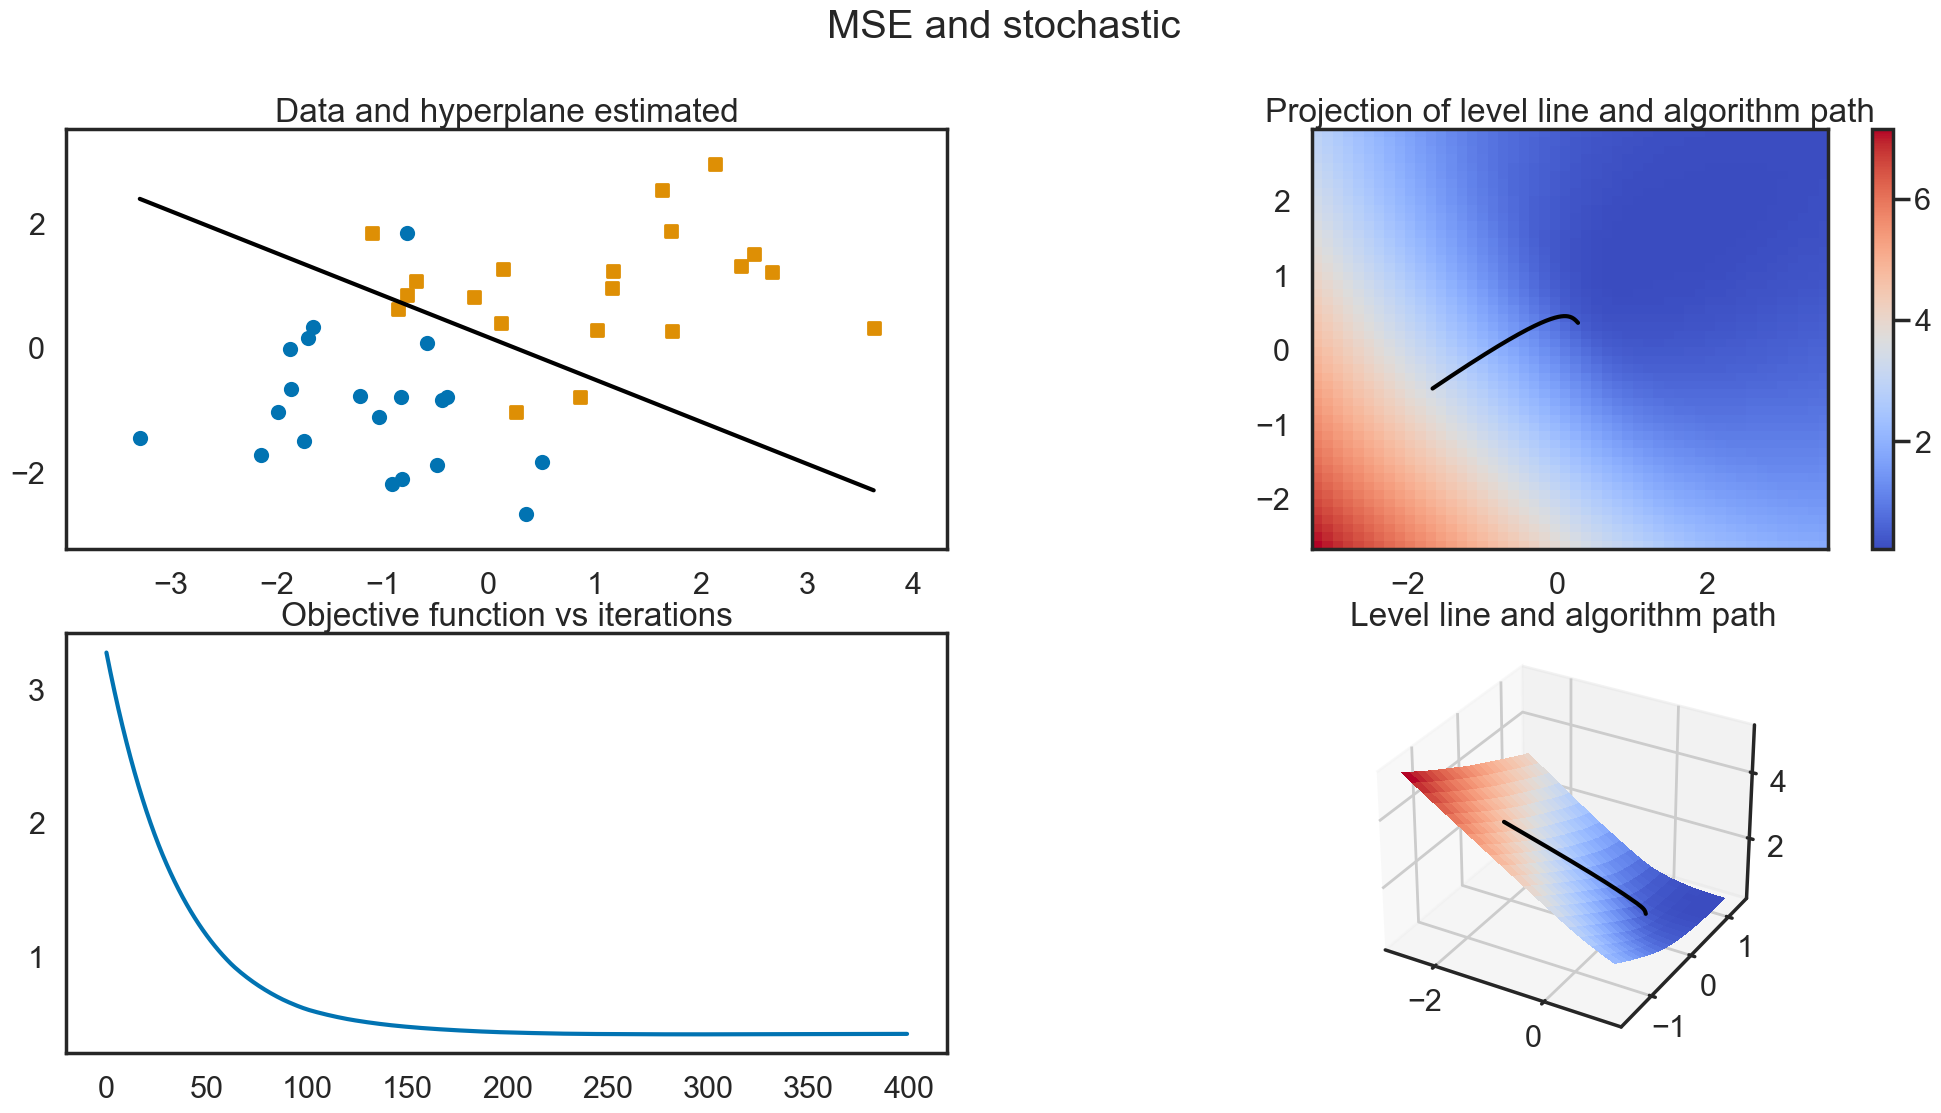

In [40]:
eps = 0.0001
plt.figure(8, figsize=(25, 12))
plt.suptitle('MSE and stochastic')
wh_sto, costh_sto = gradient(X1, y1, eps, niter * len(y1), w_ini, loss_fun,
                             gr_lfun, stochastic=False)
plot_gradient(X1, y1, wh_sto, costh_sto, loss_fun)

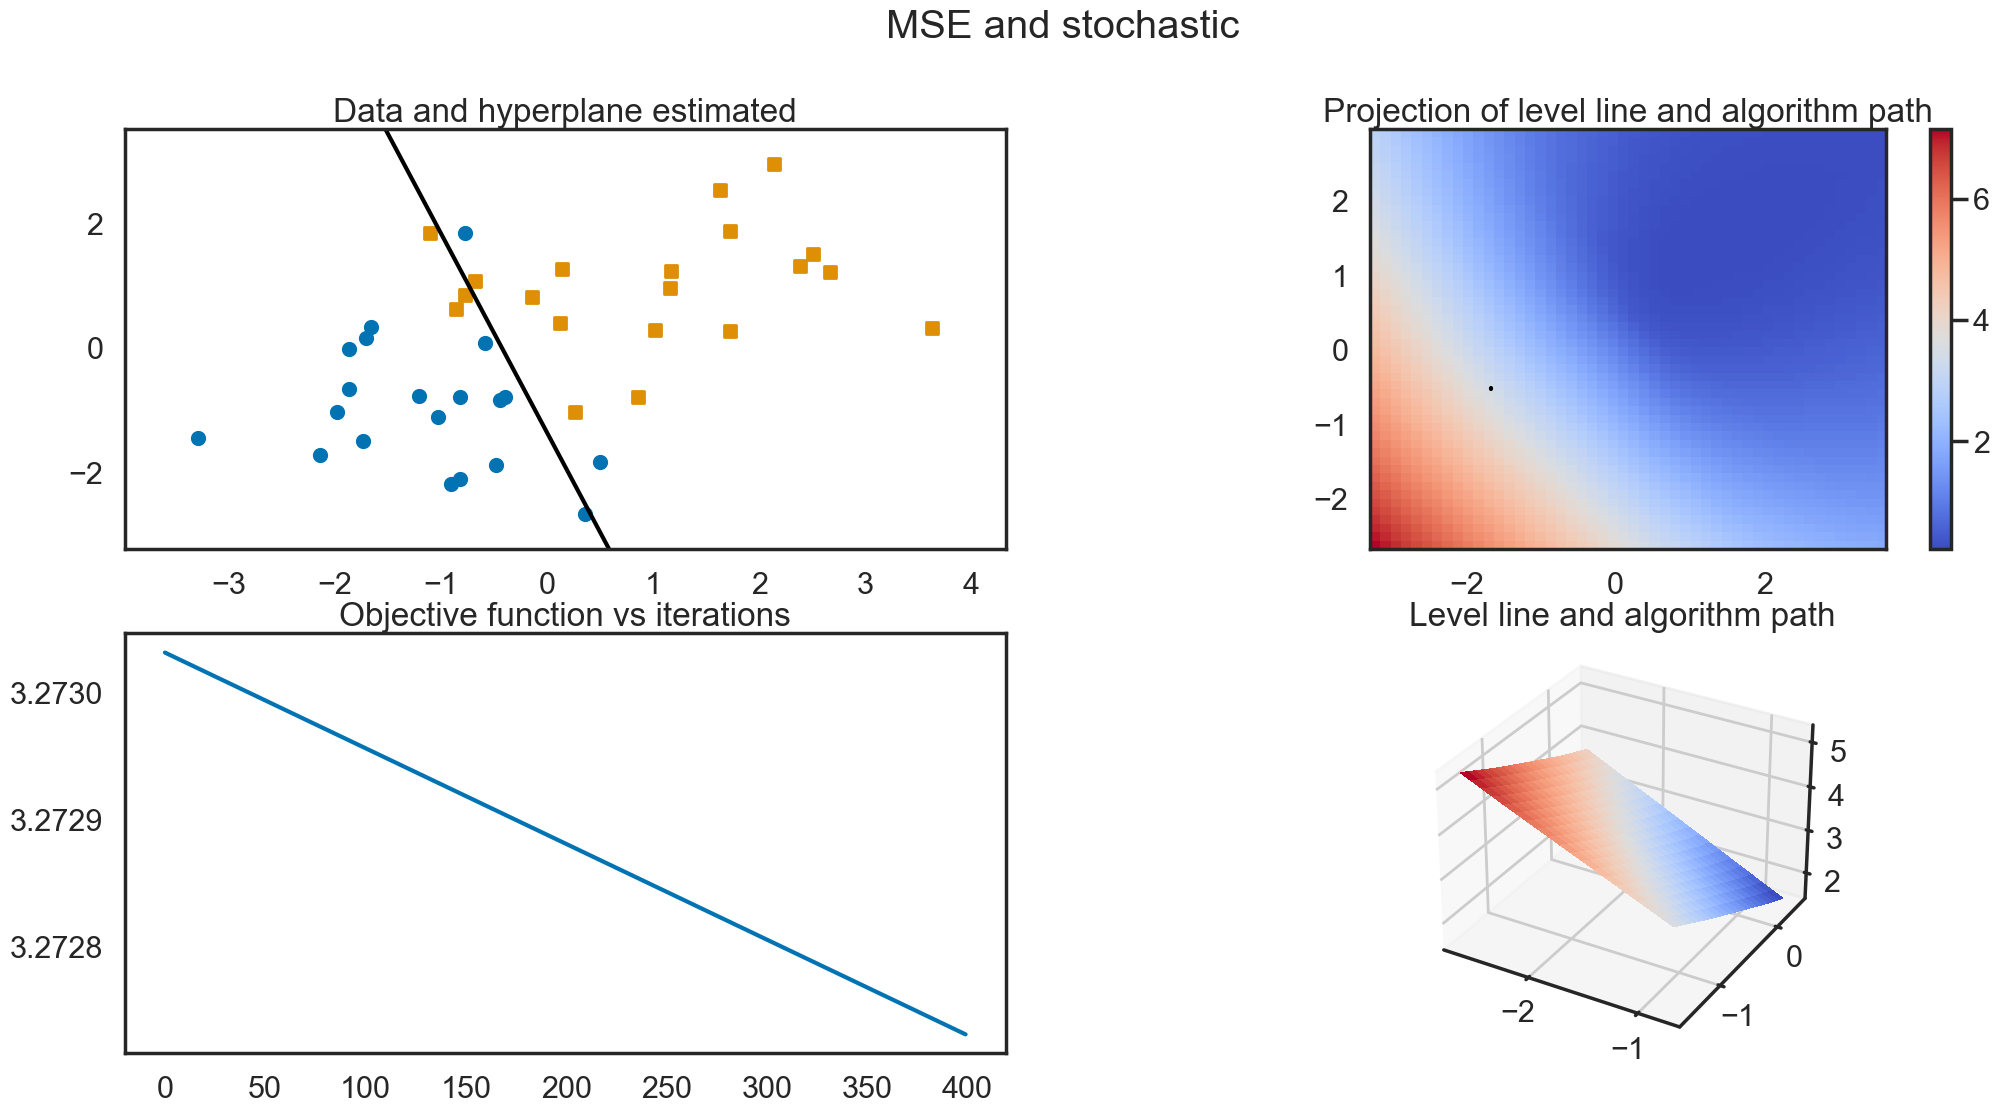

In [41]:
eps = 0.000000001
plt.figure(8, figsize=(25, 12))
plt.suptitle('MSE and stochastic')
wh_sto, costh_sto = gradient(X1, y1, eps, niter * len(y1), w_ini, loss_fun,
                             gr_lfun, stochastic=False)
plot_gradient(X1, y1, wh_sto, costh_sto, loss_fun)

#### 7.1.1. Augmentation

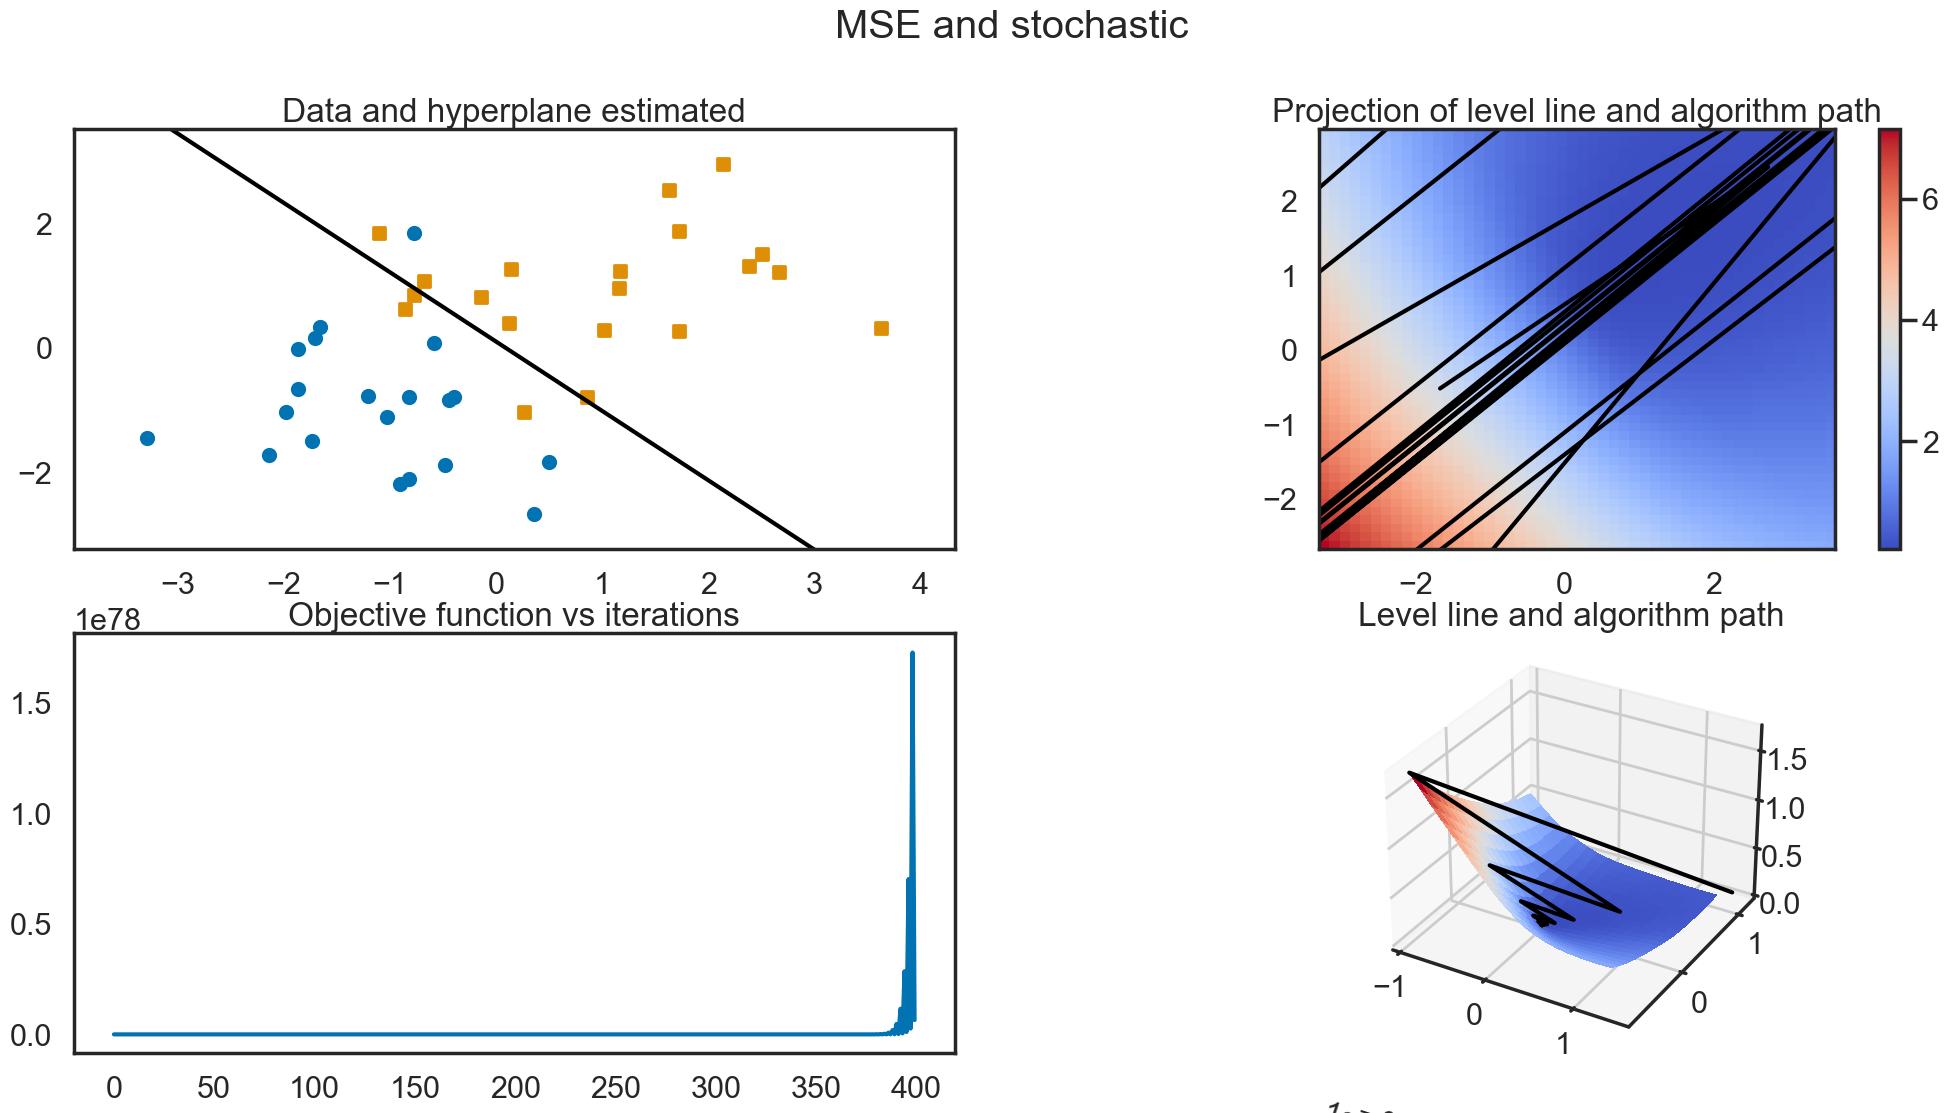

In [42]:
eps = 0.01
plt.figure(8, figsize=(25, 12))
plt.suptitle('MSE and stochastic')
wh_sto, costh_sto = gradient(X1, y1, eps, niter * len(y1), w_ini, loss_fun,
                             gr_lfun, stochastic=False)
plot_gradient(X1, y1, wh_sto, costh_sto, loss_fun)

C:\Users\Mita\Python_Telecom\Machine_learning\Perceptron de rosenbaltt\tp_perceptron_source.py:182: RuntimeWarning: invalid value encountered in scalar divide
  [min_tot0 * -w[1] / w[2] - w[0] / w[2],
C:\Users\Mita\Python_Telecom\Machine_learning\Perceptron de rosenbaltt\tp_perceptron_source.py:183: RuntimeWarning: invalid value encountered in scalar divide
  max_tot0 * -w[1] / w[2] - w[0] / w[2]],


ValueError: arange: cannot compute length

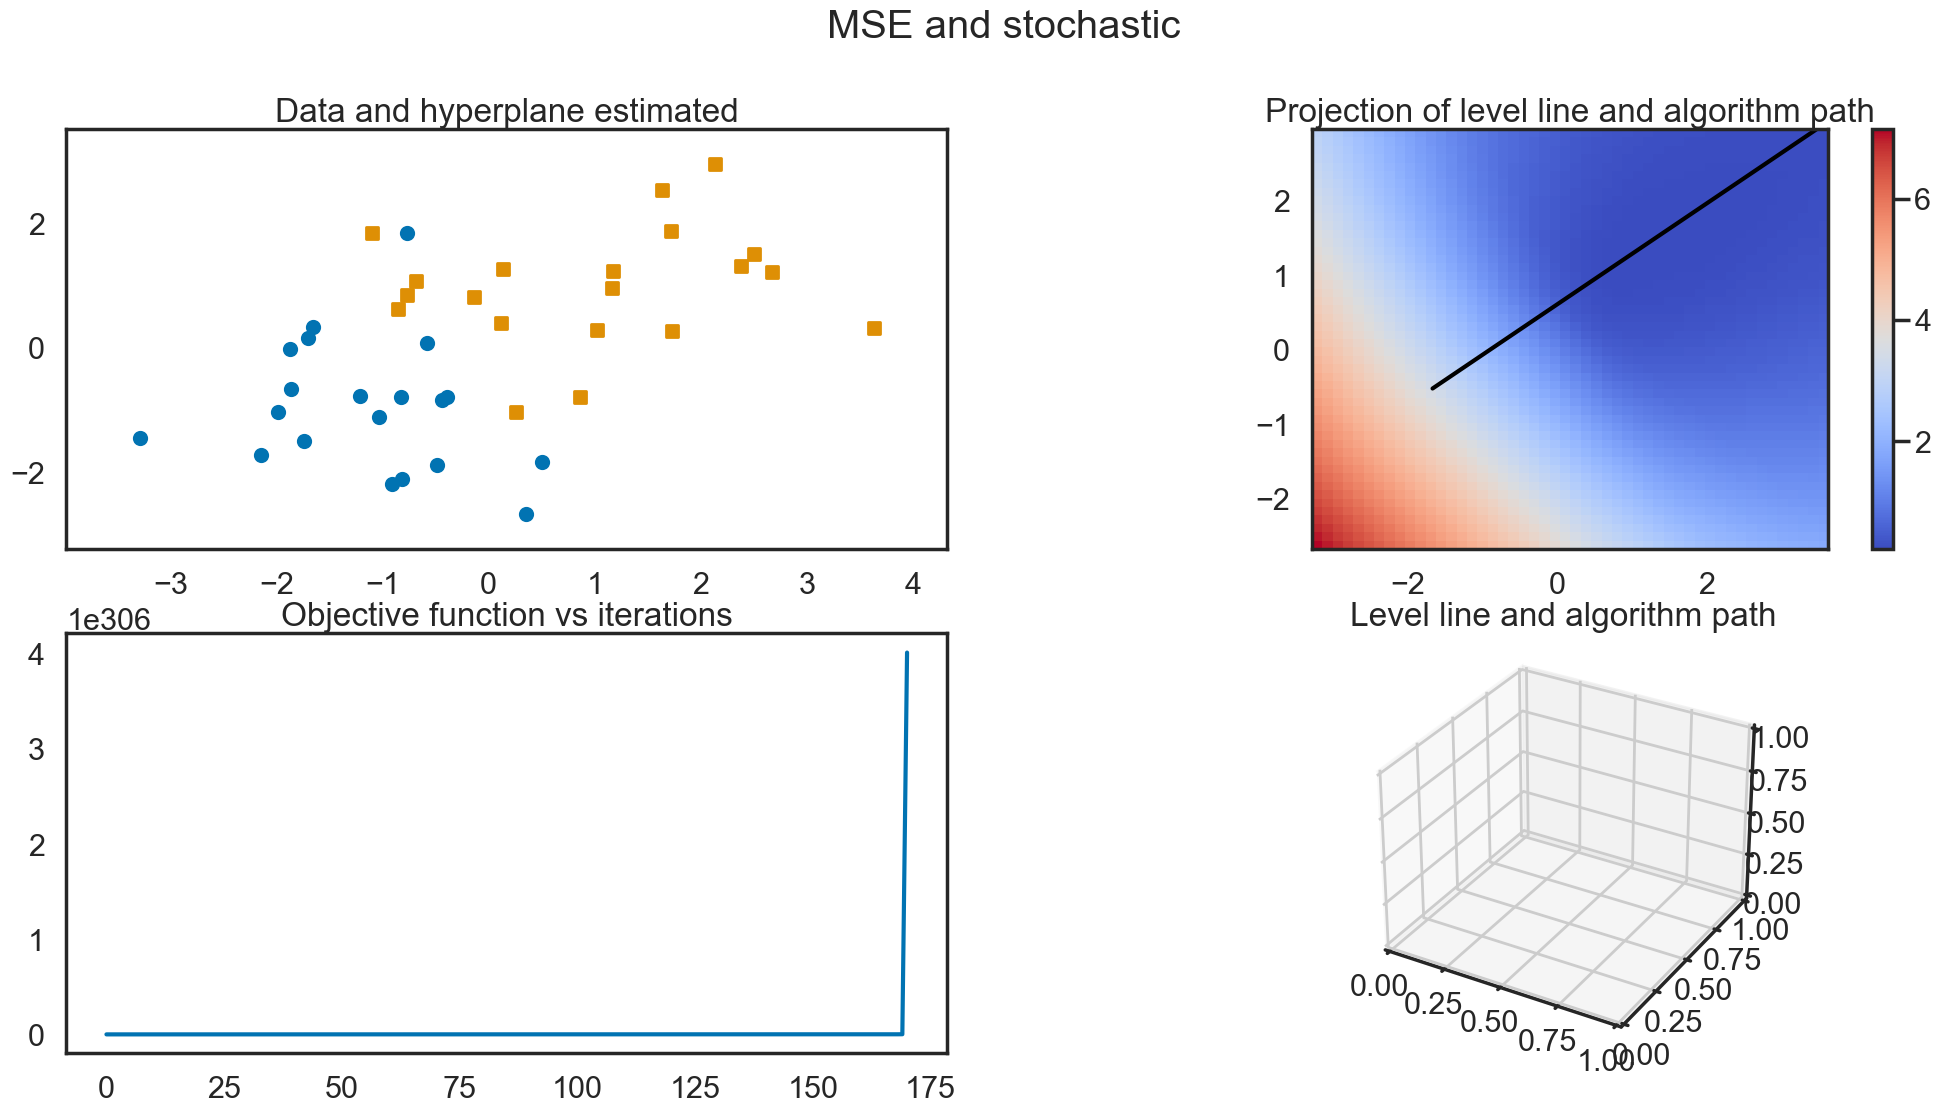

In [43]:
eps = 0.25
plt.figure(8, figsize=(25, 12))
plt.suptitle('MSE and stochastic')
wh_sto, costh_sto = gradient(X1, y1, eps, niter * len(y1), w_ini, loss_fun,
                             gr_lfun, stochastic=False)
plot_gradient(X1, y1, wh_sto, costh_sto, loss_fun)

### 7.2. Simulation avec la difficulté de classification de données (nature des données)

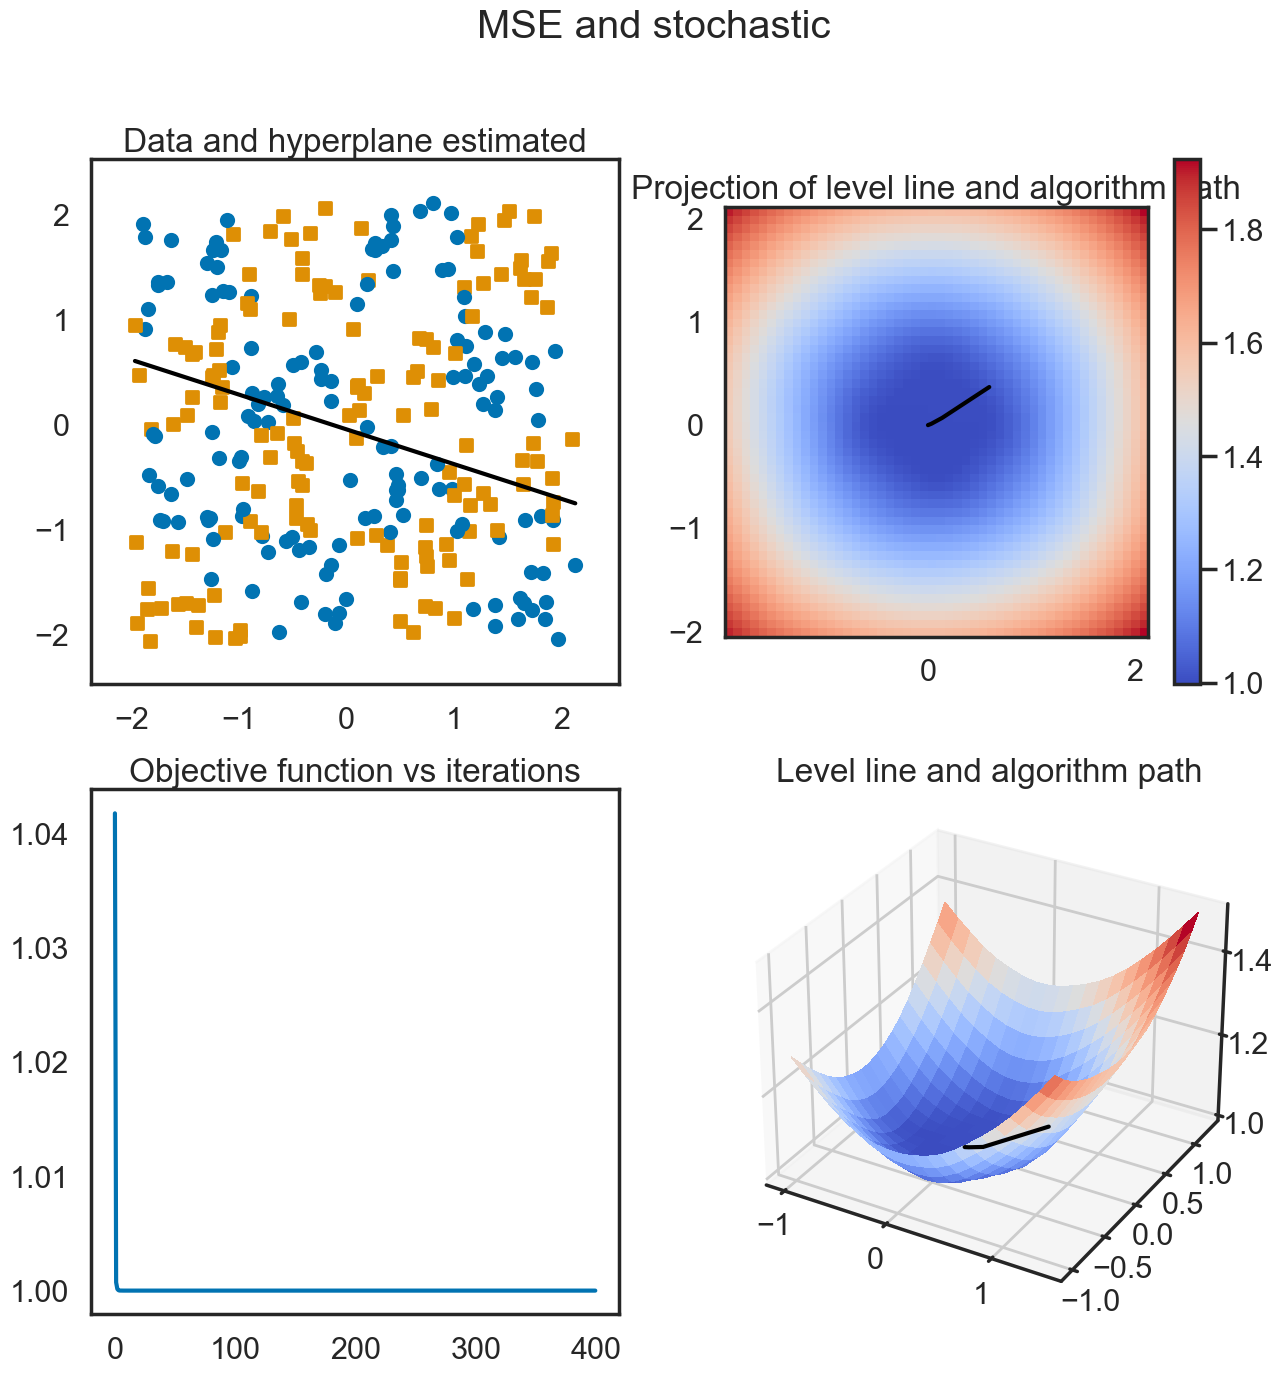

In [85]:
eps = 0.001
plt.figure(7, figsize=(15, 15))
plt.suptitle('MSE and stochastic')
wh_sto, costh_sto = gradient(X_chekers, Y_chekers, eps, niter * len(y1), w_ini, loss_fun,
                             gr_lfun, stochastic=False)
plot_gradient(X_chekers, Y_chekers, wh_sto, costh_sto, loss_fun)

# 9. Proposition des variantes de conditions d'arrêt de l'algorithme

### Condition 1 : nombre d'itération
On comme on a fait, on a fixer un nombre d'itération égal à 10. Voici donc la utilisé : 
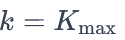
k est le nombre d'itérations actuel et Kmax est le nombre maximal d'itérations.

### Condition 2 : tolérance sur la perte
La condition est la suivante : 
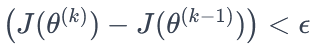
Quand les deux dernières fonctions de pertes s'améliorent d'une manière très faible.

### Condition 3 : tolérance sur les paramètres
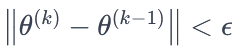
Quand la distance entre les deux paramètres ne s'améliore plus que faiblement.

### Programmation de la tolérance sur la perte

In [46]:
def gradient_1(x, y, eps, niter, w_ini, loss_fun, gr_loss_fun, threshold=1e-5, stochastic=True):
    """ Algorithme de descente du gradient :
        - x : donnees
        - y : label
        - eps : facteur multiplicatif de descente
        - niter : nombre d'iterations
        - w_ini
        - loss_fun : fonction de cout
        - gr_loss_fun : gradient de la fonction de cout
        - threshold : seuil de la norme du gradient pour la convergence
        - stochastic : True : gradient stochastique
    """
    w = np.zeros((niter, w_ini.size))
    w[0] = w_ini
    loss = np.zeros(niter)
    loss[0] = loss_fun(x, y, w[0]).mean()
    
    for i in range(1, niter):
        if stochastic:  # this is for Stochastic Gradient Descent
            idx = [np.random.randint(x.shape[0])]
        else:           # this is for pure Gradient Descent
            idx = np.arange(x.shape[0])
        
        # Calculate the gradient
        gradient_vector = gr_loss_fun(x[idx, :], y[idx], w[i - 1, :])
        
        # Check the norm of the gradient for convergence
        if np.linalg.norm(gradient_vector) <= threshold:
            print(f"Converged at iteration {i}. Norm of gradient: {np.linalg.norm(gradient_vector)}")
            break  # Stop the loop if the norm of the gradient is below the threshold
        
        # Update the weights
        w[i, :] = w[i - 1, :] - eps * gradient_vector
        
        # Calculate and store the loss
        loss[i] = loss_fun(x, y, w[i, :]).mean()
    
    return w[:i+1], loss[:i+1]

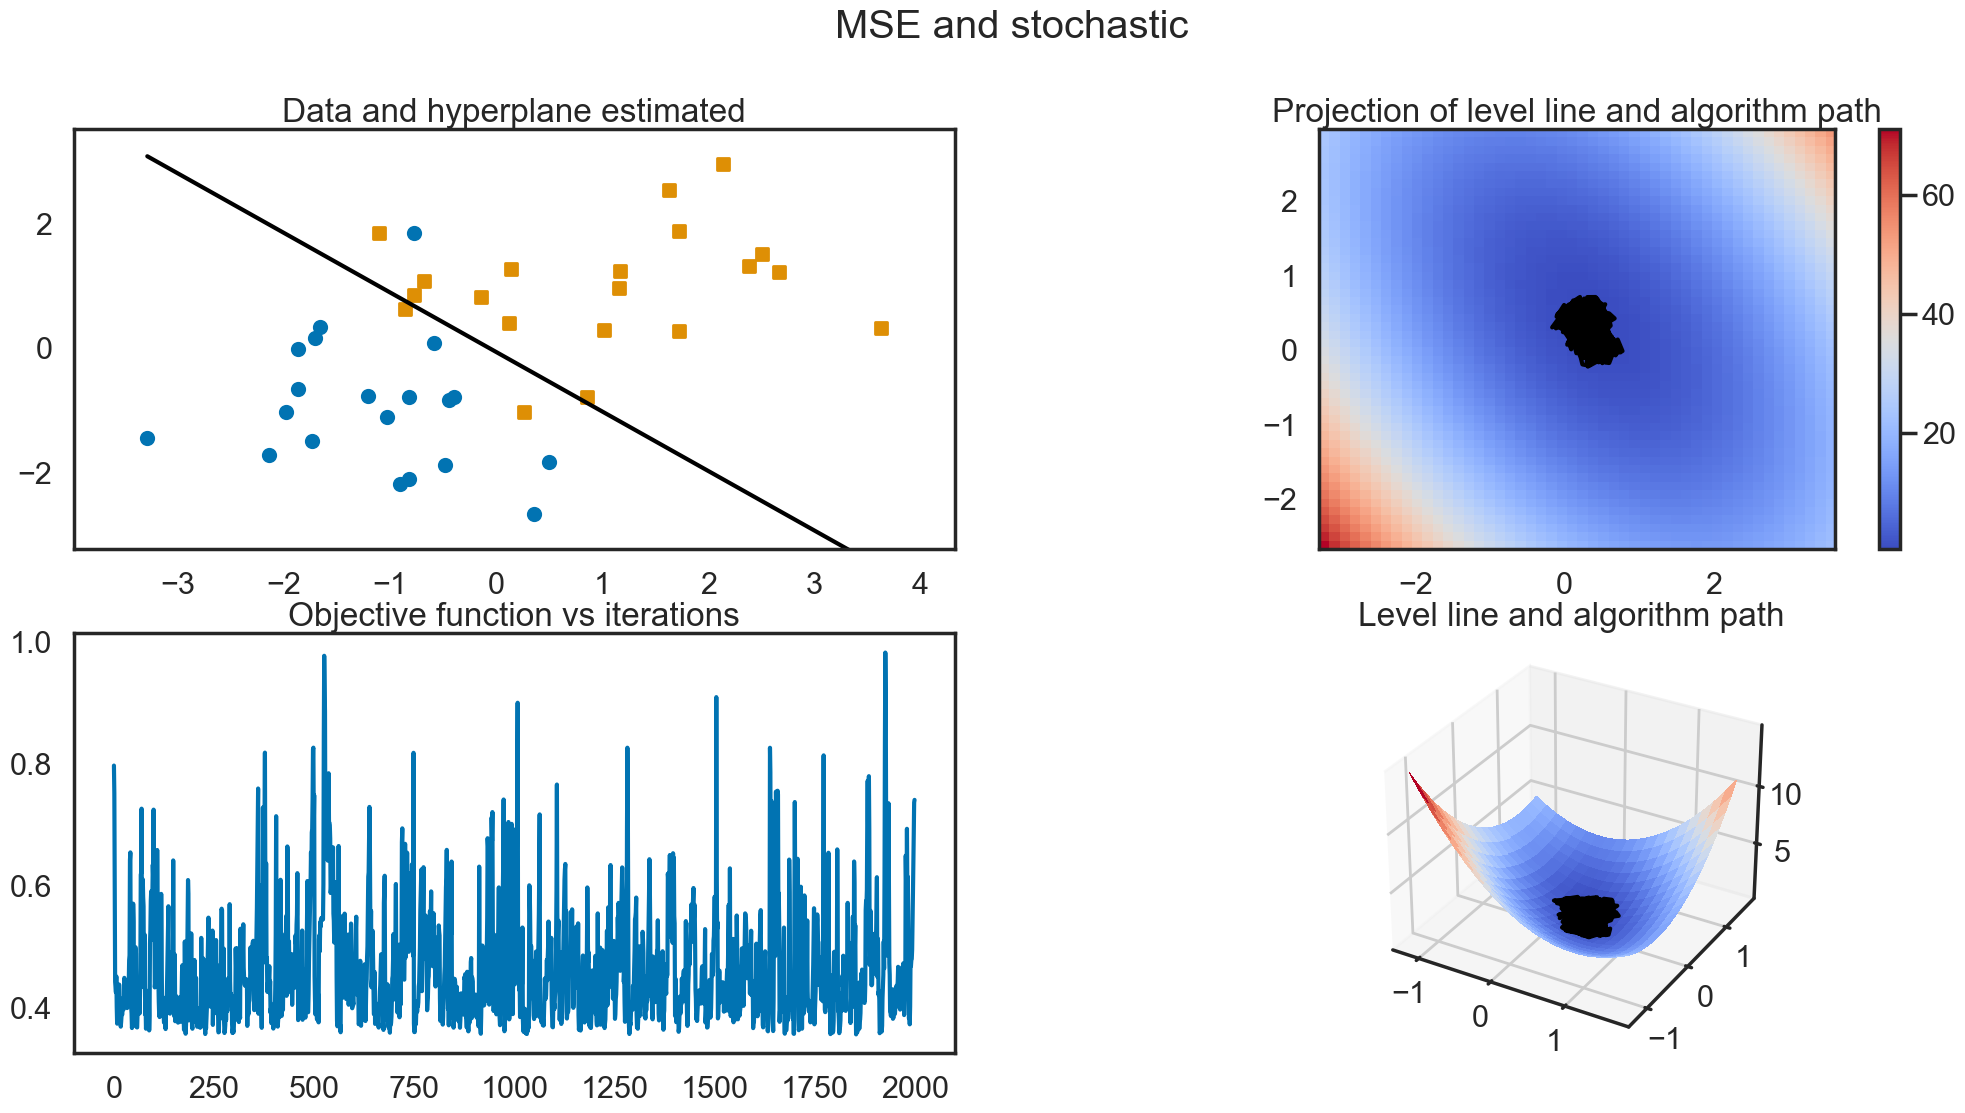

In [47]:
eps = 0.05
niter = 50
plt.figure(8, figsize=(25, 12))
plt.suptitle('MSE and stochastic')
wh_sto, costh_sto = gradient_1(X1, y1, eps, niter * len(y1), w_ini, loss_fun,
                             gr_lfun, stochastic=True)
plot_gradient(X_bi_gauss, Y_bi_gauss, wh_sto, costh_sto, loss_fun)

# 10. évolution des frontières en fonctions des itérations

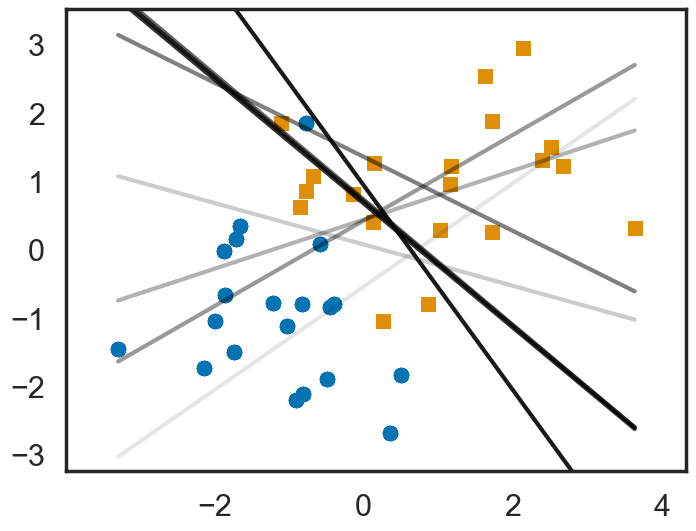

In [65]:
eps = 0.1
w_ini = np.random.randn(X1.shape[1] + 1)
loss_fun = mse_loss
gr_lfun = gr_mse_loss

plt.figure(11)
wh_sto, costh_sto = gradient(X1, y1, epsilon, niter, w_ini, loss_fun,
                             gr_lfun, stochastic=True)
indexess = np.arange(0., 1, 1. / float(niter))
for i in range(niter):
    plot_2d(X1, y1, wh_sto[i, :], alpha_choice=indexess[i])

# 12. Formules

Ellipse : 
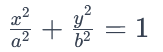

hyperparabole : 
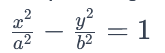

Parabole :  
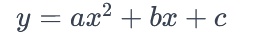